In [3]:
import pandas as pd
import numpy as np
import os

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Read the CSV file
df = pd.read_csv(r'/root/autodl-tmp/AAC concrete dataset large ratio.csv')

# Define original feature columns and target columns
original_feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

target_cols = ["7d CS", "28d CS"]

# Drop unwanted columns: "MnO", "Initial curing time (day)", "Initial curing rest time (day)"
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df = df.drop(columns=cols_to_drop)

# Update the feature columns list accordingly (remove dropped columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Convert target columns to numeric (replacing empty strings with NaN)
for col in target_cols:
    df[col] = pd.to_numeric(df[col].replace(' ', np.nan), errors='coerce')

# Print missing values in target columns
print("Missing values in target columns:")
print(df[target_cols].isnull().sum())

# Drop rows with missing target values
df_clean = df.dropna(subset=target_cols)
print(f"Dataset shape after dropping rows with missing targets: {df_clean.shape}")

# Fill missing values in specific feature columns using the median
df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())

# Extract feature and target arrays
X = df_clean[feature_cols].values
y_7 = df_clean["7d CS"].values
y_28 = df_clean["28d CS"].values

print("X shape:", X.shape)
print("y_7 shape:", y_7.shape)
print("y_28 shape:", y_28.shape)


Current working directory: /root/autodl-tmp
Missing values in target columns:
7d CS     621
28d CS    667
dtype: int64
Dataset shape after dropping rows with missing targets: (630, 73)
X shape: (630, 22)
y_7 shape: (630,)
y_28 shape: (630,)


/tmp/ipykernel_1275/748150047.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
/tmp/ipykernel_1275/748150047.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Display summary statistics to check scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print("Summary statistics for scaled features:")
print(scaled_df.describe().loc[['mean', 'std']].T)


Summary statistics for scaled features:
                                 mean       std
SiO2                     1.578984e-16  1.000795
Al2O3                    9.022765e-17  1.000795
Fe2O3                    2.255691e-17  1.000795
CaO                     -1.578984e-16  1.000795
MgO                     -6.767074e-17  1.000795
Na2O                     1.353415e-16  1.000795
K2O                     -9.022765e-17  1.000795
SO3                     -6.767074e-17  1.000795
TiO2                     6.767074e-17  1.000795
P2O5                     0.000000e+00  1.000795
SrO                      6.203151e-17  1.000795
Mn2O3                   -5.639228e-17  1.000795
LOI                      0.000000e+00  1.000795
AL/B                    -7.556566e-16  1.000795
SH/SS                    2.819614e-17  1.000795
Ms                       2.030122e-16  1.000795
Ag/B                     5.075305e-16  1.000795
W/B                     -1.127846e-17  1.000795
Sp/B                    -5.639228e-17  1.000795


NameError: name 'sns' is not defined

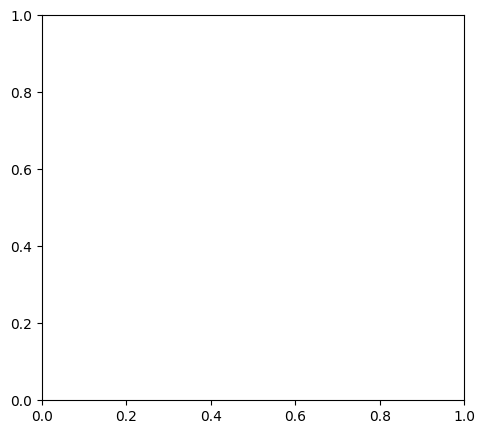

In [5]:
# Compare a couple of features before and after scaling
feature_idx = 0  # Change this index to inspect other features
feature_name = feature_cols[feature_idx]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean[feature_name], kde=True)
plt.title(f"Original {feature_name}")

plt.subplot(1, 2, 2)
sns.histplot(scaled_df[feature_name], kde=True)
plt.title(f"Scaled {feature_name}")
plt.show()


In [6]:
# Check missing values in the original DataFrame for feature and target columns
print("Missing values in original DataFrame:")
print(df[feature_cols + target_cols].isnull().sum())

# Check missing values in cleaned DataFrame
print("Missing values in cleaned DataFrame:")
print(df_clean[feature_cols + target_cols].isnull().sum())


Missing values in original DataFrame:
SiO2                         0
Al2O3                        0
Fe2O3                        0
CaO                          0
MgO                          0
Na2O                         1
K2O                          2
SO3                          0
TiO2                         0
P2O5                         0
SrO                          0
Mn2O3                        0
LOI                          0
AL/B                         0
SH/SS                        0
Ms                           0
Ag/B                         0
W/B                          0
Sp/B                         0
Initial curing temp (C)      1
Final curing temp (C)        0
Concentration (M) NaOH      18
7d CS                      621
28d CS                     667
dtype: int64
Missing values in cleaned DataFrame:
SiO2                       0
Al2O3                      0
Fe2O3                      0
CaO                        0
MgO                        0
Na2O                   

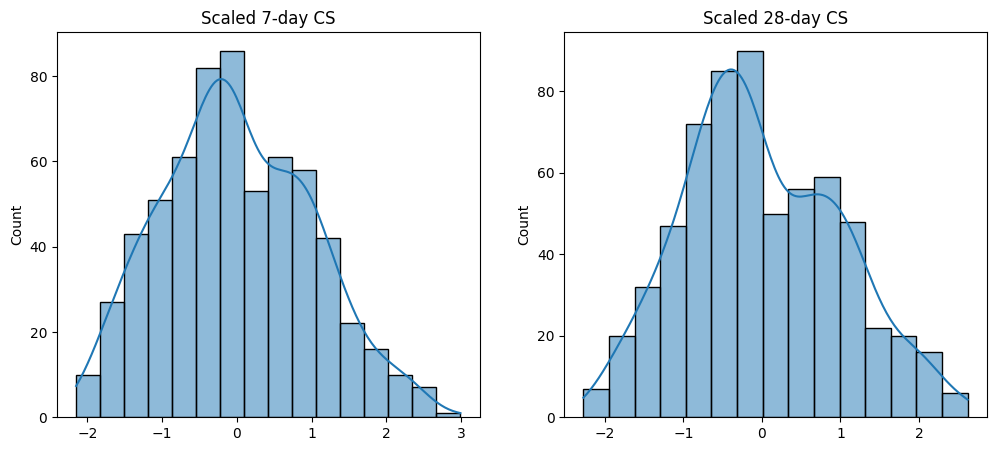

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets using y_7 and y_28 (assumes these are defined)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Visualize the scaled targets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(targets_scaled[:, 0], kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(targets_scaled[:, 1], kde=True)
plt.title("Scaled 28-day CS")
plt.show()


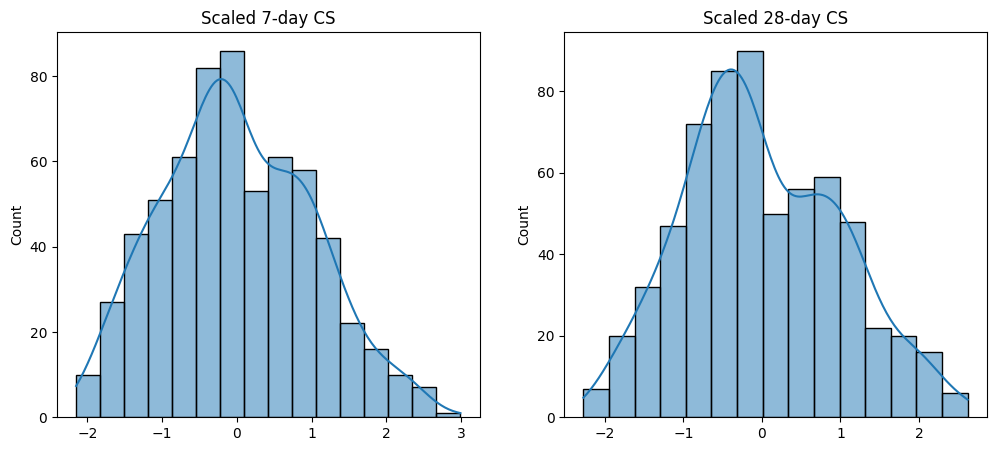

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets (assumes y_7 and y_28 are defined from your cleaned dataset)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Split the scaled targets into separate arrays
y_7_scaled = targets_scaled[:, 0]
y_28_scaled = targets_scaled[:, 1]

# Optional: Visualize the scaled target distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_7_scaled, kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(y_28_scaled, kde=True)
plt.title("Scaled 28-day CS")
plt.show()


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


Dataset size (scaled targets): 630


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class AGPModelModified(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelModified, self).__init__()
        # Increased capacity: two hidden layers
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)  # Outputs: theta1 and theta2
        self.softplus = nn.Softplus()  # to enforce theta1 > 0

    def forward(self, z, t):
        # z: (batch_size, input_dim)
        hidden = F.relu(self.fc1(z))
        hidden = F.relu(self.fc2(hidden))
        theta = self.fc3(hidden)  # (batch_size, 2)
        
        # Enforce positive theta1
        theta1 = self.softplus(theta[:, 0])  # (batch_size,)
        theta2 = theta[:, 1]                 # (batch_size,)
        
        # Use fixed time vector (if t is batched, take the first row)
        if t.ndim > 1:
            t_fixed = t[0]  # shape: (2,)
        else:
            t_fixed = t
        
        epsilon = 1e-6  # to avoid log(0)
        log_t = torch.log(t_fixed + epsilon).unsqueeze(0)  # shape: (1, 2)
        
        # Reshape theta1 and theta2 for broadcasting
        theta1 = theta1.unsqueeze(1)  # (batch_size, 1)
        theta2 = theta2.unsqueeze(1)  # (batch_size, 1)
        
        # Compute predictions: y(t) = theta1 * log(t + epsilon) + theta2
        y_pred = theta1 * log_t + theta2  # shape: (batch_size, 2)
        return y_pred

# Instantiate the modified model with your input dimension (should be 22)
input_dim = X_scaled.shape[1]
model_mod = AGPModelModified(input_dim)
print(model_mod)


AGPModelModified(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)


In [13]:
import torch.optim as optim

# Training parameters
learning_rate = 0.001
epochs = 100

criterion = nn.MSELoss()
optimizer_mod = optim.Adam(model_mod.parameters(), lr=learning_rate)

model_mod.train()
for epoch in range(epochs):
    for z, t, y in dataloader_scaled:
        optimizer_mod.zero_grad()
        y_pred = model_mod(z, t)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer_mod.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 4.1862
Epoch 20/100, Loss: 3.4714
Epoch 30/100, Loss: 2.6885
Epoch 40/100, Loss: 1.9018
Epoch 50/100, Loss: 1.2604
Epoch 60/100, Loss: 0.8960
Epoch 70/100, Loss: 0.7578
Epoch 80/100, Loss: 0.6793
Epoch 90/100, Loss: 0.6176
Epoch 100/100, Loss: 0.5795


In [14]:
model_mod.eval()
with torch.no_grad():
    for z, t, y in dataloader_scaled:
        y_pred_scaled = model_mod(z, t)

# Convert predictions to NumPy array
y_pred_scaled_np = y_pred_scaled.numpy()

# Inverse transform the predictions to the original scale.
# Note: The StandardScaler expects a 2D array.
y_pred_original = target_scaler.inverse_transform(y_pred_scaled_np)

# Also inverse-transform the true targets for comparison
y_true_scaled_np = y.numpy()  # Scaled true targets from the dataset
y_true_original = target_scaler.inverse_transform(y_true_scaled_np)

print("Sample predictions (first 5 samples) in original scale:")
print(y_pred_original[:5])
print("\nGround truth (first 5 samples) in original scale:")
print(y_true_original[:5])


Sample predictions (first 5 samples) in original scale:
[[17.960749 28.755018]
 [24.980219 37.992584]
 [24.980219 37.992584]
 [24.980219 37.992584]
 [24.540342 37.493984]]

Ground truth (first 5 samples) in original scale:
[[46.4   48.   ]
 [24.736 27.888]
 [30.656 33.088]
 [53.672 54.024]
 [36.768 38.448]]


In [11]:
from sklearn.metrics import r2_score

# Compute R² for each target on the original scale.
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R^2 for 7-day compressive strength:", r2_7)
print("R^2 for 28-day compressive strength:", r2_28)


R^2 for 7-day compressive strength: 0.29479968547821045
R^2 for 28-day compressive strength: 0.4771520495414734


Dataset size (scaled targets): 630
AGPModelModified(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/100, Loss: 3.6603
Epoch 20/100, Loss: 2.9196
Epoch 30/100, Loss: 2.1833
Epoch 40/100, Loss: 1.4799
Epoch 50/100, Loss: 0.9707
Epoch 60/100, Loss: 0.7411
Epoch 70/100, Loss: 0.6666
Epoch 80/100, Loss: 0.6136
Epoch 90/100, Loss: 0.5744
Epoch 100/100, Loss: 0.5496
R^2 for 7-day compressive strength: 0.4178353548049927
R^2 for 28-day compressive strength: 0.4872906804084778


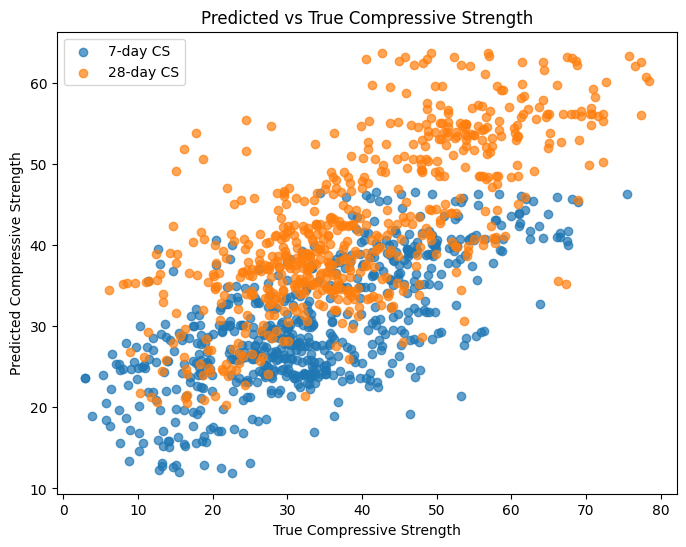

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# ----------------------------
# 1. Define the Custom Dataset
# ----------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


# ----------------------------
# 2. Define the Modified AGP Model
# ----------------------------
class AGPModelModified(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelModified, self).__init__()
        # Two hidden layers for increased capacity
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)  # Outputs: theta1 and theta2
        self.softplus = nn.Softplus()  # Enforces theta1 > 0

    def forward(self, z, t):
        hidden = F.relu(self.fc1(z))
        hidden = F.relu(self.fc2(hidden))
        theta = self.fc3(hidden)  # (batch_size, 2)
        
        # Enforce positive theta1
        theta1 = self.softplus(theta[:, 0])  # (batch_size,)
        theta2 = theta[:, 1]                 # (batch_size,)
        
        # Use fixed time vector (if t is batched, take the first row)
        if t.ndim > 1:
            t_fixed = t[0]  # shape: (2,)
        else:
            t_fixed = t
        
        epsilon = 1e-6  # Avoid log(0)
        log_t = torch.log(t_fixed + epsilon).unsqueeze(0)  # shape: (1, 2)
        
        # Reshape theta1 and theta2 for broadcasting
        theta1 = theta1.unsqueeze(1)  # (batch_size, 1)
        theta2 = theta2.unsqueeze(1)  # (batch_size, 1)
        
        # Prediction: y(t) = theta1 * log(t + epsilon) + theta2
        y_pred = theta1 * log_t + theta2  # shape: (batch_size, 2)
        return y_pred

# Instantiate the model using the input dimension (should be 22)
input_dim = X_scaled.shape[1]
model_mod = AGPModelModified(input_dim)
print(model_mod)


# ----------------------------
# 3. Define Default Training & Evaluation Functions
# ----------------------------
def train_model(model, dataloader, optimizer, criterion, epochs=100):
    model.train()
    for epoch in range(epochs):
        for z, t, y in dataloader:
            optimizer.zero_grad()
            y_pred = model(z, t)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

def evaluate_model(model, dataloader):
    model.eval()
    with torch.no_grad():
        for z, t, y in dataloader:
            y_pred = model(z, t)
    return y_pred, y

# ----------------------------
# 4. Train the Model Using Default Settings
# ----------------------------
# Default training parameters
LEARNING_RATE = 0.001
EPOCHS = 100

criterion = nn.MSELoss()
optimizer_mod = optim.Adam(model_mod.parameters(), lr=LEARNING_RATE)

# Train the model
train_model(model_mod, dataloader_scaled, optimizer_mod, criterion, epochs=EPOCHS)


# ----------------------------
# 5. Evaluate the Model and Compute R² Scores
# ----------------------------
# Evaluate on the training set (or use a validation set if available)
y_pred_scaled, y_scaled = evaluate_model(model_mod, dataloader_scaled)

# Convert predictions and true targets to NumPy arrays
y_pred_scaled_np = y_pred_scaled.numpy()
y_true_scaled_np = y_scaled.numpy()

# Inverse-transform predictions and true targets to original scale.
# (Assumes target_scaler was defined and fitted on original target values.)
y_pred_original = target_scaler.inverse_transform(y_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_true_scaled_np)

# Compute R² scores for 7-day and 28-day compressive strengths
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R^2 for 7-day compressive strength:", r2_7)
print("R^2 for 28-day compressive strength:", r2_28)

# ----------------------------
# 6. (Optional) Visualize Predictions vs Ground Truth
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Dataset size (scaled targets): 630
AGPModelGP(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/500, NLL Loss: 4.6307
Epoch 20/500, NLL Loss: 4.1463
Epoch 30/500, NLL Loss: 3.7749
Epoch 40/500, NLL Loss: 3.5016
Epoch 50/500, NLL Loss: 3.3050
Epoch 60/500, NLL Loss: 3.1327
Epoch 70/500, NLL Loss: 2.9538
Epoch 80/500, NLL Loss: 2.7653
Epoch 90/500, NLL Loss: 2.5881
Epoch 100/500, NLL Loss: 2.4300
Epoch 110/500, NLL Loss: 2.2846
Epoch 120/500, NLL Loss: 2.1494
Epoch 130/500, NLL Loss: 2.0232
Epoch 140/500, NLL Loss: 1.9155
Epoch 150/500, NLL Loss: 1.8244
Epoch 160/500, NLL Loss: 1.7430
Epoch 170/500, NLL Loss: 1.6677
Epoch 180/500, NLL Loss: 1.5970
Epoch 190/500, NLL Loss: 1.5296
Epoch 200/500, NLL Loss: 1.4655
Epoch 210/500, NLL Loss: 1.4051
Epoch 220/500, NLL Loss: 1.3485
Epoch 230/500

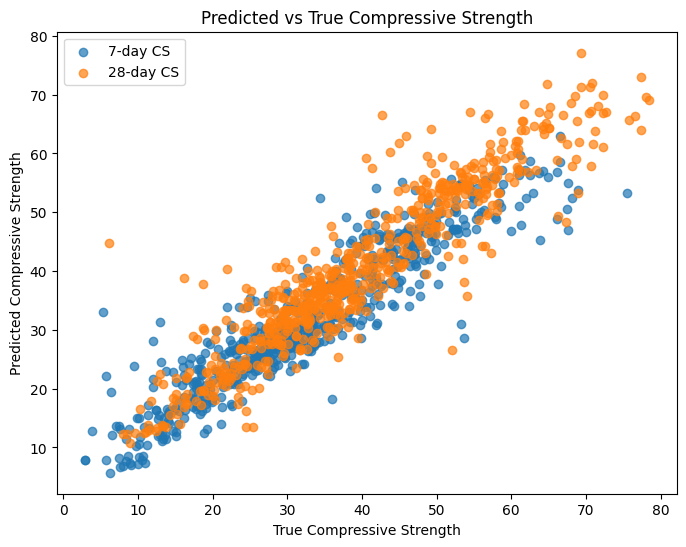

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))

# -----------------------------------------------------------------------------
# 3. AGP Model with GP Hyperparameters
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelGP, self).__init__()
        # Two hidden layers MLP mapping mix design features to GP hyperparameters.
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        # Output 5 parameters: theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(16, 5)
        self.softplus = nn.Softplus()  # to enforce positivity where needed

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: slope for the mean function (enforced positive)
          theta2: intercept for the mean function
          l: lengthscale for the kernel (positive)
          sigma_f: kernel variance (positive)
          sigma_n: noise variance (positive)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# Instantiate the model (input_dim should match your feature count, e.g., 22)
input_dim = X_scaled.shape[1]
model_gp = AGPModelGP(input_dim).to(device)
print(model_gp)

# -----------------------------------------------------------------------------
# 4. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    Compute the GP negative log likelihood over a batch.
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: tensors of shape (batch_size,)
      t: 1D tensor of time points, shape (n_t,) (e.g., [7.0, 28.0])
      y: tensor of true targets for each sample, shape (batch_size, n_t)
      epsilon: small constant for numerical stability.
    
    Returns:
      Mean negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # number of time points, should be 2
    total_nll = 0.0
    # Precompute log(t + epsilon) for the mean function
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # Compute the mean vector for sample i
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # Compute pairwise squared differences for time points
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # Add noise variance to the diagonal
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # Add jitter for numerical stability
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # Compute the Cholesky decomposition
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 5. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # Move data to device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    Evaluate model using the mean function prediction.
    Returns predictions and true targets.
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # Move data to device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 6. Training the Model
# -----------------------------------------------------------------------------
# Fixed time vector as a torch tensor (for 7 and 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Set up optimizer and training parameters
learning_rate = 0.001
epochs = 500
optimizer_gp = optim.Adam(model_gp.parameters(), lr=learning_rate)

# Train the GP model
train_gp_model(model_gp, dataloader_scaled, t_fixed, optimizer_gp, epochs=epochs)

# -----------------------------------------------------------------------------
# 7. Evaluation and R² Computation
# -----------------------------------------------------------------------------
# Evaluate model to get mean function predictions
m_pred_scaled, y_scaled = evaluate_gp_model(model_gp, dataloader_scaled, t_fixed)

# Convert predictions and targets to NumPy arrays
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# Inverse-transform to original scale.
# (Assumes target_scaler was defined and fitted on original target values.)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

# Compute R² scores for each target
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("R² for 7-day compressive strength:", r2_7)
print("R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 8. (Optional) Visualize Predictions vs Ground Truth
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126
AGPModelGP(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/500, NLL Loss: 5.3033
Epoch 20/500, NLL Loss: 4.7710
Epoch 30/500, NLL Loss: 4.3948
Epoch 40/500, NLL Loss: 4.0531
Epoch 50/500, NLL Loss: 3.7150
Epoch 60/500, NLL Loss: 3.3993
Epoch 70/500, NLL Loss: 3.1130
Epoch 80/500, NLL Loss: 2.8630
Epoch 90/500, NLL Loss: 2.6621
Epoch 100/500, NLL Loss: 2.5082
Epoch 110/500, NLL Loss: 2.3833
Epoch 120/500, NLL Loss: 2.2759
Epoch 130/500, NLL Loss: 2.1816
Epoch 140/500, NLL Loss: 2.1010
Epoch 150/500, NLL Loss: 2.0322
Epoch 160/500, NLL Loss: 1.9712
Epoch 170/500, NLL Loss: 1.9152
Epoch 180/500, NLL Loss: 1.8639
Epoch 190/500, NLL Loss: 1.8161
Epoch 200/500, NLL Loss: 1.7691
Epoch 210/500, NLL Loss: 1.7213
Epoch 220/500, NLL Loss: 1.6728
E

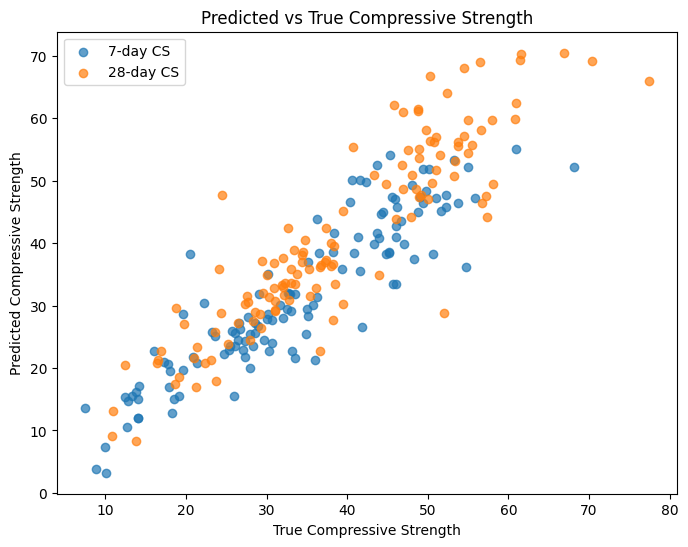

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
# 使用 sklearn 的 train_test_split 進行拆分 (80% train, 20% test)
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# 建立 Dataset
train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 建立 DataLoader (這裡採用 full-batch, 可根據需求調整 batch size)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelGP, self).__init__()
        # 兩層隱藏層的 MLP，將 mix design features 映射到 GP hyperparameters
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        # 輸出 5 個參數：theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(16, 5)
        self.softplus = nn.Softplus()  # 確保部分參數為正值

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: mean function 的 slope (經過 softplus 保證正值)
          theta2: mean function 的 intercept
          l: kernel 的 lengthscale (正值)
          sigma_f: kernel 的 variance (正值)
          sigma_n: noise variance (正值)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # 形狀: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 假設 input_dim 與 X_scaled 的特徵數相同 (例如 22)
input_dim = X_scaled.shape[1]
model_gp = AGPModelGP(input_dim).to(device)
print(model_gp)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    計算整個 batch 的 GP negative log likelihood (NLL)
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: shape (batch_size,)
      t: 1D tensor，形狀 (n_t,) (例如 [7.0, 28.0])
      y: 真實 target, shape (batch_size, n_t)
      epsilon: 小數值，保證數值穩定性
      
    Returns:
      平均的 negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # time points 數量 (應該是 2)
    total_nll = 0.0
    # 預先計算 log(t + epsilon)
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # 計算第 i 個樣本的 mean vector: m = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # 計算 time point 間的平方差距 (pairwise squared differences)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # 在對角線上加入 noise variance
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # 加入 jitter 增強數值穩定性
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # 使用 Cholesky 分解
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    用 mean function 預測來評估模型。
    返回預測值和真實 target。
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Training the Model
# -----------------------------------------------------------------------------
# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# 設定 optimizer 與 training 參數
learning_rate = 0.001
epochs = 500
optimizer_gp = optim.Adam(model_gp.parameters(), lr=learning_rate)

# 在 training data 上訓練模型
train_gp_model(model_gp, train_loader, t_fixed, optimizer_gp, epochs=epochs)

# -----------------------------------------------------------------------------
# 8. Evaluation and R² Computation on Test Data
# -----------------------------------------------------------------------------
# 使用 test data 進行評估，得到 mean function 預測
m_pred_scaled, y_scaled = evaluate_gp_model(model_gp, test_loader, t_fixed)

# 將預測與 target 轉換為 numpy 陣列
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 利用 target_scaler 進行逆轉換 (注意：target_scaler 須先於原始 target 上進行 fit)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

# 計算 7-day 與 28-day compressive strength 的 R² 分數
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("R² for 7-day compressive strength:", r2_7)
print("R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. (Optional) Visualize Predictions vs Ground Truth
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126

Training with lr=0.001, hidden_dim1=32, hidden_dim2=16
Epoch 10/300, NLL Loss: 4.0092
Epoch 20/300, NLL Loss: 3.8463
Epoch 30/300, NLL Loss: 3.6518
Epoch 40/300, NLL Loss: 3.3998
Epoch 50/300, NLL Loss: 3.0597
Epoch 60/300, NLL Loss: 2.6804
Epoch 70/300, NLL Loss: 2.4246
Epoch 80/300, NLL Loss: 2.2655
Epoch 90/300, NLL Loss: 2.1325
Epoch 100/300, NLL Loss: 2.0139
Epoch 110/300, NLL Loss: 1.8985
Epoch 120/300, NLL Loss: 1.7941
Epoch 130/300, NLL Loss: 1.6968
Epoch 140/300, NLL Loss: 1.6083
Epoch 150/300, NLL Loss: 1.5268
Epoch 160/300, NLL Loss: 1.4456
Epoch 170/300, NLL Loss: 1.3662
Epoch 180/300, NLL Loss: 1.2926
Epoch 190/300, NLL Loss: 1.2134
Epoch 200/300, NLL Loss: 1.1363
Epoch 210/300, NLL Loss: 1.0635
Epoch 220/300, NLL Loss: 0.9912
Epoch 230/300, NLL Loss: 0.9248
Epoch 240/300, NLL Loss: 0.8609
Epoch 250/300, NLL Loss: 0.7972
Epoch 260/300, NLL Loss: 0.7425
Epoch 270/300, NLL Loss: 0.6957
Epoch 280/300, NLL Loss

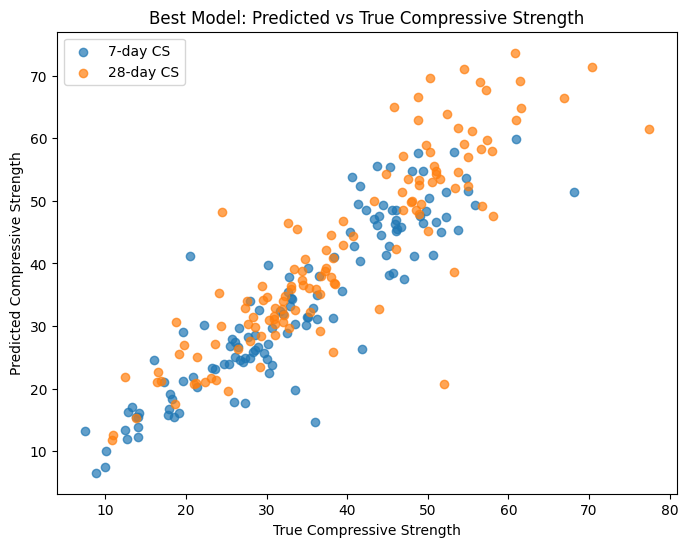

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
# 使用 sklearn 的 train_test_split 進行拆分 (80% train, 20% test)
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# 建立 Dataset
train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 建立 DataLoader (這裡採用 full-batch, 可根據需求調整 batch size)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (修改後可接受 hidden_dim 設定)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=32, hidden_dim2=16):
        super(AGPModelGP, self).__init__()
        # 兩層隱藏層的 MLP，將 mix design features 映射到 GP hyperparameters
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # 輸出 5 個參數：theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()  # 確保部分參數為正值

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: mean function 的 slope (經過 softplus 保證正值)
          theta2: mean function 的 intercept
          l: kernel 的 lengthscale (正值)
          sigma_f: kernel 的 variance (正值)
          sigma_n: noise variance (正值)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # 形狀: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 假設 input_dim 與 X_scaled 的特徵數相同 (例如 22)
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    計算整個 batch 的 GP negative log likelihood (NLL)
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: shape (batch_size,)
      t: 1D tensor，形狀 (n_t,) (例如 [7.0, 28.0])
      y: 真實 target, shape (batch_size, n_t)
      epsilon: 小數值，保證數值穩定性
      
    Returns:
      平均的 negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # time points 數量 (應該是 2)
    total_nll = 0.0
    # 預先計算 log(t + epsilon)
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # 計算第 i 個樣本的 mean vector: m = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # 計算 time point 間的平方差距 (pairwise squared differences)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # 在對角線上加入 noise variance
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # 加入 jitter 增強數值穩定性
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # 使用 Cholesky 分解
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 每 10 個 epoch 輸出一次訓練損失
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    用 mean function 預測來評估模型。
    返回預測值和真實 target。
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Hyperparameter Tuning (Grid Search)
# -----------------------------------------------------------------------------
# 定義超參數搜索空間
learning_rates = [0.001, 0.0005]
hidden_dim1_list = [32, 64]
hidden_dim2_list = [16, 32]
num_epochs = 300  # 為了加快搜索速度，可減少訓練 epoch 數

# 用來保存最佳模型與結果
best_r2 = -np.inf
best_params = None
results = []

for lr in learning_rates:
    for hidden_dim1 in hidden_dim1_list:
        for hidden_dim2 in hidden_dim2_list:
            print(f"\nTraining with lr={lr}, hidden_dim1={hidden_dim1}, hidden_dim2={hidden_dim2}")
            
            # 初始化模型與 optimizer
            model = AGPModelGP(input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2).to(device)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            
            # 訓練模型 (這裡使用 train_loader 上訓練)
            train_gp_model(model, train_loader, t_fixed, optimizer, epochs=num_epochs)
            
            # 在 test_loader 上評估模型 (使用 mean function 預測)
            m_pred_scaled, y_scaled = evaluate_gp_model(model, test_loader, t_fixed)
            m_pred_scaled_np = m_pred_scaled.numpy()
            y_scaled_np = y_scaled.numpy()
            
            # 注意：這裡 target_scaler 須先前對原始 target fit 過
            y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
            y_true_original = target_scaler.inverse_transform(y_scaled_np)
            
            # 計算 R² 分數 (這裡採用 7-day 與 28-day 的平均 R²)
            r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
            r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
            avg_r2 = (r2_7 + r2_28) / 2
            print(f"R² 7-day: {r2_7:.4f},  R² 28-day: {r2_28:.4f},  Avg R²: {avg_r2:.4f}")
            
            # 保存結果
            results.append({
                "lr": lr,
                "hidden_dim1": hidden_dim1,
                "hidden_dim2": hidden_dim2,
                "r2_7": r2_7,
                "r2_28": r2_28,
                "avg_r2": avg_r2
            })
            
            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {"lr": lr, "hidden_dim1": hidden_dim1, "hidden_dim2": hidden_dim2}

print("\nBest Hyperparameters:")
print(best_params)
print("Best Avg R²:", best_r2)

# -----------------------------------------------------------------------------
# 8. (Optional) Visualize Predictions vs Ground Truth with Best Model
# -----------------------------------------------------------------------------
# 重新用最佳超參數訓練一次模型（可使用更多 epoch），並在 test set 上繪圖
model_best = AGPModelGP(input_dim, hidden_dim1=best_params["hidden_dim1"], hidden_dim2=best_params["hidden_dim2"]).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_params["lr"])
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


Epoch 10/500, NLL Loss: 4.4439
Epoch 20/500, NLL Loss: 3.6319
Epoch 30/500, NLL Loss: 3.1332
Epoch 40/500, NLL Loss: 2.8207
Epoch 50/500, NLL Loss: 2.5689
Epoch 60/500, NLL Loss: 2.3644
Epoch 70/500, NLL Loss: 2.2096
Epoch 80/500, NLL Loss: 2.0630
Epoch 90/500, NLL Loss: 1.9222
Epoch 100/500, NLL Loss: 1.8005
Epoch 110/500, NLL Loss: 1.6943
Epoch 120/500, NLL Loss: 1.5969
Epoch 130/500, NLL Loss: 1.5003
Epoch 140/500, NLL Loss: 1.3992
Epoch 150/500, NLL Loss: 1.2955
Epoch 160/500, NLL Loss: 1.1893
Epoch 170/500, NLL Loss: 1.0874
Epoch 180/500, NLL Loss: 0.9836
Epoch 190/500, NLL Loss: 0.8838
Epoch 200/500, NLL Loss: 0.7924
Epoch 210/500, NLL Loss: 0.7102
Epoch 220/500, NLL Loss: 0.6354
Epoch 230/500, NLL Loss: 0.5789
Epoch 240/500, NLL Loss: 0.5215
Epoch 250/500, NLL Loss: 0.4684
Epoch 260/500, NLL Loss: 0.4288
Epoch 270/500, NLL Loss: 0.3928
Epoch 280/500, NLL Loss: 0.3550
Epoch 290/500, NLL Loss: 0.3232
Epoch 300/500, NLL Loss: 0.2963
Epoch 310/500, NLL Loss: 0.2729
Epoch 320/500, NL

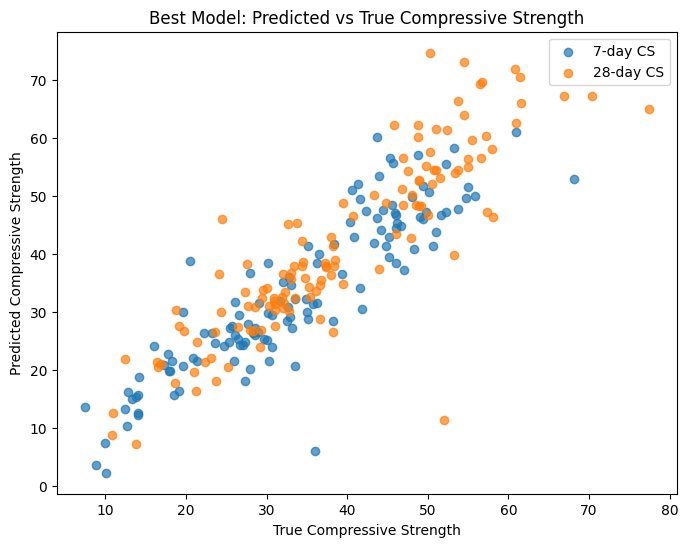

In [16]:
epochs = 500
model_best = AGPModelGP(input_dim, hidden_dim1=best_params["hidden_dim1"], hidden_dim2=best_params["hidden_dim2"]).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_params["lr"])
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()

In [17]:
from sklearn.metrics import r2_score

# Calculate R2 scores for each compressive strength metric
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R2 for 7-day CS:", r2_7)
print("R2 for 28-day CS:", r2_28)


R2 for 7-day CS: 0.7692276835441589
R2 for 28-day CS: 0.6807478666305542


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (支持自定義 hidden_dim)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=32, hidden_dim2=16):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)  # 輸出 5 個參數
        self.softplus = nn.Softplus()  # 保證部分參數為正

    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 假設特徵數 (例如 22)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7.0, 28.0)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (含 StepLR)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, scheduler, epochs=100):
    """
    修改點：
    1. 在函數參數中增加 scheduler，並在每個 epoch 結束後調用 scheduler.step()。
    2. 每隔 10 個 epoch 輸出目前的 NLL 與當前的 learning rate。
    """
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()  # 更新 learning rate
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            current_lr = scheduler.get_last_lr()[0]
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}, LR: {current_lr:.6f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 利用最佳超參數重新訓練最終模型 (使用 StepLR 調整 learning rate)
# -----------------------------------------------------------------------------
epochs = 500  # 定義總訓練 epoch 數

# 使用最佳超參數初始化模型 (最佳超參數：lr=0.001, hidden_dim1=64, hidden_dim2=32)
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.001)
scheduler_best = optim.lr_scheduler.StepLR(optimizer_best, step_size=100, gamma=0.5)

# 重新訓練最終模型
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, scheduler_best, epochs=epochs)

# -----------------------------------------------------------------------------
# 8. 在 test set 上評估模型並計算 R² 分數
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 利用 target_scaler 逆轉換 (請確保 target_scaler 已對原始 target fit)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final R² for 7-day compressive strength:", r2_7)
print("Final R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. 可視化結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126
Epoch 10/500, NLL Loss: 4.3842, LR: 0.001000
Epoch 20/500, NLL Loss: 3.7744, LR: 0.001000
Epoch 30/500, NLL Loss: 3.4309, LR: 0.001000
Epoch 40/500, NLL Loss: 3.1174, LR: 0.001000
Epoch 50/500, NLL Loss: 2.7958, LR: 0.001000
Epoch 60/500, NLL Loss: 2.5116, LR: 0.001000
Epoch 70/500, NLL Loss: 2.2974, LR: 0.001000


KeyboardInterrupt: 

In [ ]:
# 訓練完成後打印最終模型參數
print("Final Model Parameters:")
for name, param in model_best.state_dict().items():
    print(name, param)

# 也可以打印當前的 learning rate
final_lr = optimizer_best.param_groups[0]['lr']
print("Final Learning Rate:", final_lr)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 使用 full-batch（若資料量過大請調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)  # 輸出 5 個參數
        self.softplus = nn.Softplus()  # 保證部分參數為正

    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 假設特徵數 (例如 22)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7.0, 28.0)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 訓練最終模型 (直接使用 lr = 3.125e-05)
# -----------------------------------------------------------------------------
epochs = 200  # 總訓練 epoch 數
# 將初始 learning rate 直接設為 3.125e-05
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.001)

# 訓練模型
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

# 印出最終的 learning rate 與模型參數
final_lr = optimizer_best.param_groups[0]['lr']
print("Final Learning Rate:", final_lr)
print("Final Model Parameters:")
for name, param in model_best.state_dict().items():
    print(name, param)

# -----------------------------------------------------------------------------
# 8. 評估模型並計算 R² 分數
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 請確保 target_scaler 已對原始 target fit 過
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final R² for 7-day compressive strength:", r2_7)
print("Final R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. 可視化結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch 訓練（根據數據大小可以調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (使用 StepLR)
# -----------------------------------------------------------------------------
def train_gp_model_with_scheduler(model, dataloader, t, optimizer, scheduler, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()  # 更新 learning rate
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            current_lr = scheduler.get_last_lr()[0]
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}, LR: {current_lr:.6f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 使用 StepLR 從 0.01 開始調整 Learning Rate
# -----------------------------------------------------------------------------
epochs = 2000
# 使用最佳超參數：hidden_dim1=64, hidden_dim2=32，初始 lr 設為 0.01
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.01)
# 每 100 個 epoch 將 lr 乘以 0.5
scheduler_best = optim.lr_scheduler.StepLR(optimizer_best, step_size=100, gamma=0.5)

# 驗證集監控：使用的是我們拆分出的 val_dataset (X_val, y7_val, y28_val)
best_r2 = -np.inf
best_model_wts = copy.deepcopy(model_best.state_dict())
best_lr = None

for epoch in range(epochs):
    # 訓練一個 epoch
    train_gp_model_with_scheduler(model_best, train_loader, t_fixed, optimizer_best, scheduler_best, epochs=1)
    
    # 在驗證集上評估
    m_val, y_val = evaluate_gp_model(model_best, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Validation after epoch {epoch+1}: R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    
    # 保存最佳模型權重與當時的學習率
    if avg_r2_val > best_r2:
        best_r2 = avg_r2_val
        best_model_wts = copy.deepcopy(model_best.state_dict())
        best_lr = optimizer_best.param_groups[0]['lr']

print("\nBest Validation Avg R²:", best_r2)
print("Best Learning Rate at that time:", best_lr)

# 載入最佳模型權重
model_best.load_state_dict(best_model_wts)

# -----------------------------------------------------------------------------
# 8. 在 Test Set 上評估模型
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7_test = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_test = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_test)
print("Final Test R² for 28-day compressive strength:", r2_28_test)

# -----------------------------------------------------------------------------
# 9. 可視化 Test Set 結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model (StepLR from 0.01): Predicted vs True Compressive Strength")
plt.show()


In [ ]:
print("\nBest Validation Avg R²:", best_r2)
print("Best Learning Rate at that time:", best_lr)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經正確定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 這裡使用 full-batch（根據數據量可調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set
# -----------------------------------------------------------------------------
epochs = 500
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nTraining with learning rate = {lr}")
    # 為每個學習率初始化一個新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    train_gp_model(model_temp, train_loader, t_fixed, optimizer_temp, epochs=epochs)
    
    # 在 Validation Set 上評估
    m_val, y_val = evaluate_gp_model(model_temp, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    # 請確保 target_scaler 已對原始 target fit 過
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Learning rate = {lr} => R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    results[lr] = avg_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. Use Best Learning Rate: Re-train Model on Training Set and Evaluate on Test Set
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經正確定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 這裡使用 full-batch（根據數據量可調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set
# -----------------------------------------------------------------------------
epochs = 300
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nTraining with learning rate = {lr}")
    # 為每個學習率初始化一個新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    train_gp_model(model_temp, train_loader, t_fixed, optimizer_temp, epochs=epochs)
    
    # 在 Validation Set 上評估
    m_val, y_val = evaluate_gp_model(model_temp, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    # 請確保 target_scaler 已對原始 target fit 過
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Learning rate = {lr} => R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    results[lr] = avg_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. Use Best Learning Rate: Re-train Model on Training Set and Evaluate on Test Set
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


In [ ]:
print("Scaler mean:", target_scaler.mean_)
print("Scaler scale:", target_scaler.scale_)

In [ ]:
print("Original y7 mean:", np.mean(y_7_train))
print("Original y28 mean:", np.mean(y_28_train))
print("Original y7 std:", np.std(y_7_train))
print("Original y28 std:", np.std(y_28_train))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设 X_scaled, y_7_scaled, y_28_scaled, targets_df 已经定义，
# 且 target_scaler 已经 fit 好原始目标数据，例如：
# target_scaler = StandardScaler()
# target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 先拆分出测试集，再从剩余数据中拆出验证集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可以调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (使用 Early Stopping)
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        # 训练一个 epoch
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 每 10 个 epoch 打印一次训练损失
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # 使用 target_scaler 逆转换（请确保 target_scaler 已经 fit 过原始 target）
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set with Early Stopping
# -----------------------------------------------------------------------------
num_epochs = 500
patience = 50
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nGrid search: Training with learning rate = {lr}")
    # 为每个学习率初始化一个新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    # 使用 early stopping 在验证集上评估
    model_temp, best_r2_val = train_gp_model_early_stopping(model_temp, train_loader, val_loader, t_fixed, optimizer_temp, num_epochs=num_epochs, patience=patience)
    print(f"Learning rate = {lr} => Best Validation Avg R²: {best_r2_val:.4f}")
    results[lr] = best_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. 使用最佳 Learning Rate 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
model_best, _ = train_gp_model_early_stopping(model_best, train_loader, val_loader, t_fixed, optimizer_best, num_epochs=num_epochs, patience=patience)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设原始目标数据存储在 targets_df 中（包含7-day和28-day），先对其 fit
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df shape: (n_samples, 2)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义
X_train, X_test, y7_train, y7_test, y28_train, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Final Model Training using Learning Rate = 0.01
# -----------------------------------------------------------------------------
final_epochs = 400
best_lr = 0.01  # 直接使用 0.01

model_final = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)

print(f"\nTraining final model with learning rate = {best_lr}")
train_gp_model(model_final, train_loader, t_fixed, optimizer_final, epochs=final_epochs)

# -----------------------------------------------------------------------------
# 8. Evaluate on Test Set
# -----------------------------------------------------------------------------
m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()

# 使用 target_scaler 将预测值和真实值反变换到原始尺度
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. Visualize Test Set Results
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -2.0738, 28-day: -5.0567, Avg: -3.5652
Validation R²: 7-day: -2.0055, 28-day: -4.9171, Avg: -3.4613
Validation R²: 7-day: -1.9109, 28-day: -4.7263, Avg: -3.3186
Validation R²: 7-day: -1.7599, 28-day: -4.4354, Avg: -3.0976
Validation R²: 7-day: -1.5421, 28-day: -4.0099, Avg: -2.7760
Validation R²: 7-day: -1.2805, 28-day: -3.5000, Avg: -2.3903
Validation R²: 7-day: -1.0011, 28-day: -2.9535, Avg: -1.9773
Validation R²: 7-day: -0.7050, 28-day: -2.3677, Avg: -1.5363
Validation R²: 7-day: -0.4218, 28-day: -1.7886, Avg: -1.1052
Epoch 10/500, Training NLL Loss: 3.6211
Validation R²: 7-day: -0.1817, 28-day: -1.2683, Avg: -0.7250
Validation R²: 7-day: 0.0093, 28-day: -0.8178, Avg: -0.4043
Validation R²: 7-day: 0.1572, 28-day: -0.4296, Avg: -0.1362
Validation R²: 7-day: 0.2594, 28-day: -0.1159, Avg: 0.0718
Validation R²: 7-day: 0.3142, 28-day: 0.1105, Avg: 0.2123
Validation R²: 7-day

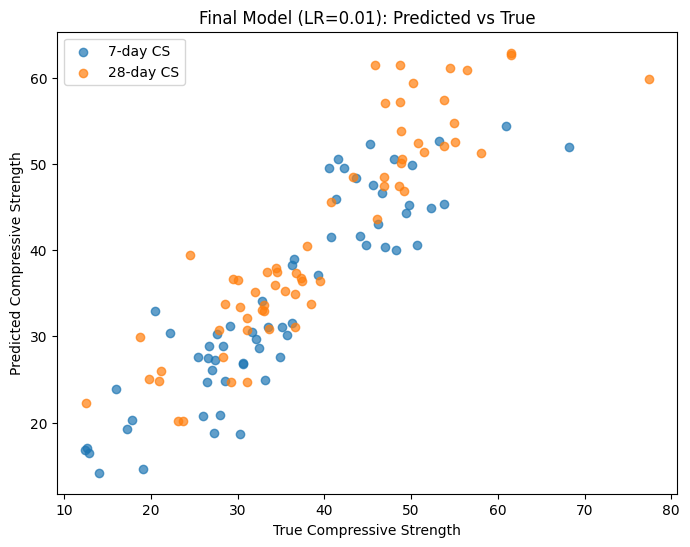

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设原始目标数据存储在 targets_df 中（形状: (n_samples, 2)），先对其 fit
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df 是原始目标数据

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义
# 首先拆分出测试集，再从剩余数据中拆分出验证集 (80%/10%/10%)
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)  # 输出 5 个参数
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 使用改进模型
model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5*(diff**2)/(l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. 使用最佳 Learning Rate 0.01: 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
final_epochs = 500
best_lr = 0.01

model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=final_epochs, patience=50)

m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.6099, 28-day: -4.0642, Avg: -2.8370
Validation R²: 7-day: -1.5167, 28-day: -3.8641, Avg: -2.6904
Validation R²: 7-day: -1.3618, 28-day: -3.5662, Avg: -2.4640
Validation R²: 7-day: -1.1168, 28-day: -3.1068, Avg: -2.1118
Validation R²: 7-day: -0.8555, 28-day: -2.6061, Avg: -1.7308
Validation R²: 7-day: -0.5945, 28-day: -2.0866, Avg: -1.3405
Validation R²: 7-day: -0.3531, 28-day: -1.5790, Avg: -0.9660
Validation R²: 7-day: -0.0975, 28-day: -1.0413, Avg: -0.5694
Validation R²: 7-day: 0.1622, 28-day: -0.5136, Avg: -0.1757
Epoch 10/300, Training NLL Loss: 2.9193
Validation R²: 7-day: 0.3930, 28-day: -0.0470, Avg: 0.1730
Validation R²: 7-day: 0.5254, 28-day: 0.2579, Avg: 0.3916
Validation R²: 7-day: 0.5540, 28-day: 0.4159, Avg: 0.4850
Validation R²: 7-day: 0.5394, 28-day: 0.5128, Avg: 0.5261
Validation R²: 7-day: 0.5118, 28-day: 0.5664, Avg: 0.5391
Validation R²: 7-day: 0.5258

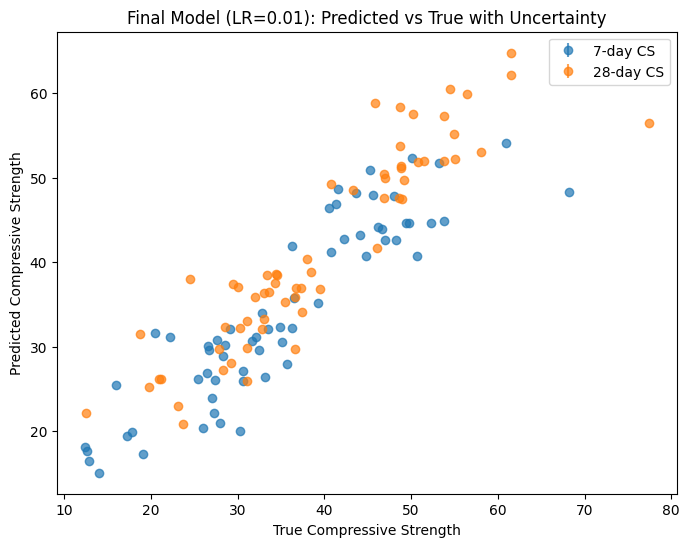

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # Convert features to a torch tensor of type float32.
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two target arrays (7-day and 28-day) and convert to tensor.
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples.
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# First split out the test set (10%), then split the remaining data into train and validation (approx. 80%/10%).
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # about 10% for validation

# Create datasets for train, validation, and test.
train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Create DataLoaders (using full-batch training).
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        # First fully connected layer with BatchNorm.
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        # Second fully connected layer with BatchNorm.
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        # Third fully connected layer with BatchNorm.
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        # Dropout layer to help prevent overfitting.
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer to predict 5 GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # Ensure positivity for some outputs.
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        # theta1 and theta2 define the mean function: m(t) = theta1 * log(t) + theta2
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        # l, sigma_f, sigma_n are GP hyperparameters; we ensure they are positive using exp.
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# Set model class and input dimension.
model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1] 

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    # Get batch size and number of time points (should be 2: 7 and 28).
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        # Mean function: m(t) = theta1 * log(t) + theta2.
        m = theta1[i] * log_t + theta2[i]
        # Compute pairwise differences of time points.
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        # Compute RBF kernel.
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # Inverse transform using the fitted target_scaler.
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            # Compute the predicted mean using the mean function: m(t) = theta1 * log(t) + theta2.
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Predict with Uncertainty
# -----------------------------------------------------------------------------
def predict_with_uncertainty(model, dataloader, t, epsilon=1e-6):
    """
    For each sample, compute the predicted mean and predictive variance.
    Predicted mean m = theta1 * log(t) + theta2.
    For each sample, compute the kernel matrix K based on predicted hyperparameters,
    then for each time point j, compute:
        var_j = K[j,j] - k_j^T * K^{-1} * k_j
    Ensure var_j is non-negative.
    """
    model.eval()
    t = t.to(device)
    all_means, all_vars, all_y = [], [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            # Compute predicted mean for each sample.
            m = theta1.unsqueeze(1) * torch.log(t + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            batch_vars = []
            for i in range(z.size(0)):
                diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t.size(0), device=t.device)
                K = K + epsilon * torch.eye(t.size(0), device=t.device)
                K_inv = torch.linalg.inv(K)
                var_sample = []
                for j in range(t.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_j = max(var_j, 0)  # Ensure non-negative variance.
                    var_sample.append(var_j)
                batch_vars.append(var_sample)
            all_means.append(m.cpu())
            all_vars.append(torch.tensor(batch_vars))
            all_y.append(y.cpu())
    m_all = torch.cat(all_means, dim=0)
    var_all = torch.cat(all_vars, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, var_all, y_all

# -----------------------------------------------------------------------------
# 8. Final Model Training with LR = 0.01 and Early Stopping, then Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.01

# Initialize final model using the improved model architecture.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
# Train model using early stopping based on validation set performance.
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use predict_with_uncertainty to get predictive mean and variance on the test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

# Inverse transform predictions and true targets to original scale.
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. Visualize Test Set Results with Uncertainty (using error bars)
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# Use square root of variance as standard deviation for error bars.
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=np.sqrt(var_pred_np[:, 0]), fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=np.sqrt(var_pred_np[:, 1]), fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.9689, 28-day: -4.7643, Avg: -3.3666
Validation R²: 7-day: -1.9393, 28-day: -4.6635, Avg: -3.3014
Validation R²: 7-day: -1.8958, 28-day: -4.5342, Avg: -3.2150
Validation R²: 7-day: -1.8128, 28-day: -4.3338, Avg: -3.0733
Validation R²: 7-day: -1.6705, 28-day: -4.0039, Avg: -2.8372
Validation R²: 7-day: -1.4333, 28-day: -3.4999, Avg: -2.4666
Validation R²: 7-day: -1.1263, 28-day: -2.8650, Avg: -1.9956
Validation R²: 7-day: -0.7679, 28-day: -2.1586, Avg: -1.4633
Validation R²: 7-day: -0.4018, 28-day: -1.4756, Avg: -0.9387
Epoch 10/300, Training NLL Loss: 3.1136
Validation R²: 7-day: -0.0923, 28-day: -0.9190, Avg: -0.5057
Validation R²: 7-day: 0.1375, 28-day: -0.4931, Avg: -0.1778
Validation R²: 7-day: 0.3216, 28-day: -0.1641, Avg: 0.0788
Validation R²: 7-day: 0.4643, 28-day: 0.1119, Avg: 0.2881
Validation R²: 7-day: 0.5147, 28-day: 0.2881, Avg: 0.4014
Validation R²: 7-day: 

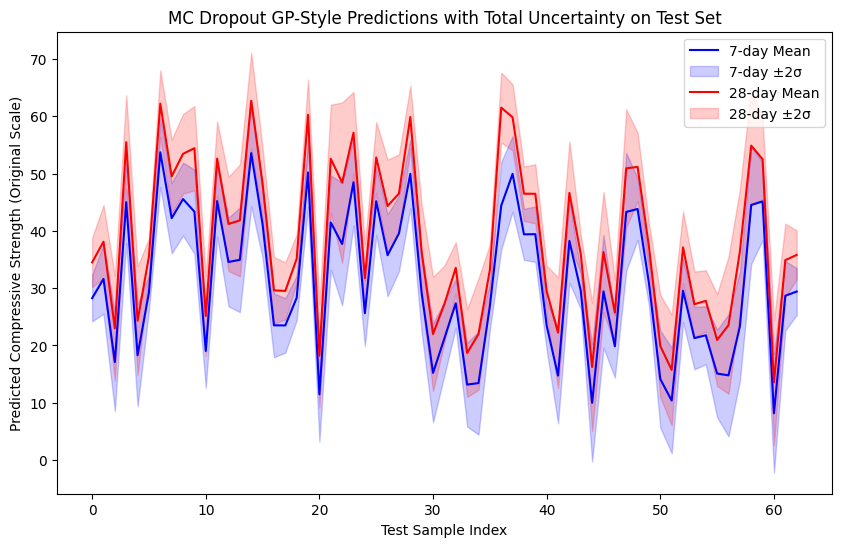

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2 (for 7 and 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. MC Dropout Inference for Total Uncertainty
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
      
    Note: Instead of using the time tensor from the dataloader, we use the fixed time vector 't'.
    """
    model.train()  # Enable dropout during inference.
    all_mc_means = []
    all_kernel_vars = []
    
    for z, _, y in dataloader:  # Ignore the stacked time tensor.
        z = z.to(device)
        t_fixed_in = t.to(device)  # Use fixed time vector t (shape: (2,))
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    # Predictive mean and epistemic variance.
    pred_mean = np.mean(mc_means, axis=0)  # shape: (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # shape: (n_total, n_t)
    
    # Total variance: sum of epistemic (MC dropout) and kernel (aleatoric) variance.
    pred_total_var = pred_epistemic_var + mc_vars  # shape: (n_total, n_t)
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 8. Final Model Training (Early Stopping) and Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.01
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. GP-Style Visualization: Plot Continuous Line with Shaded ±2σ Regions
# -----------------------------------------------------------------------------
x = np.arange(len(y_pred_original))

plt.figure(figsize=(10, 6))
plt.plot(x, y_pred_original[:, 0], color='blue', label='7-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 0] - 2*std_7_original,
                 y_pred_original[:, 0] + 2*std_7_original,
                 color='blue', alpha=0.2, label='7-day ±2σ')
plt.plot(x, y_pred_original[:, 1], color='red', label='28-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 1] - 2*std_28_original,
                 y_pred_original[:, 1] + 2*std_28_original,
                 color='red', alpha=0.2, label='28-day ±2σ')
                 
plt.title("MC Dropout GP-Style Predictions with Total Uncertainty on Test Set")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.legend()
plt.show()


In [33]:
print("Target scaler std values:", target_scaler.scale_)
print("Mean predicted variance (scaled) for 7-day:", np.mean(var_pred_np[:, 0]))
print("Mean predicted variance (original) for 7-day:", np.mean(var_7_original))


Target scaler std values: [14.11858949 14.78614898]
Mean predicted variance (scaled) for 7-day: 9.934108e-09
Mean predicted variance (original) for 7-day: 12.76466607858068


In [35]:
print("Mean predicted variance (original) for 28-day:", np.mean(var_28_original))


Mean predicted variance (original) for 28-day: 14.624751494039927


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -0.8631, 28-day: -2.8328, Avg: -1.8479
Validation R²: 7-day: -0.7048, 28-day: -2.4748, Avg: -1.5898
Validation R²: 7-day: -0.5177, 28-day: -2.0681, Avg: -1.2929
Validation R²: 7-day: -0.3394, 28-day: -1.7134, Avg: -1.0264
Validation R²: 7-day: -0.1224, 28-day: -1.2819, Avg: -0.7022
Validation R²: 7-day: 0.0575, 28-day: -0.8891, Avg: -0.4158
Validation R²: 7-day: 0.1870, 28-day: -0.5393, Avg: -0.1761
Validation R²: 7-day: 0.2585, 28-day: -0.3108, Avg: -0.0261
Validation R²: 7-day: 0.3016, 28-day: -0.1959, Avg: 0.0529
Epoch 10/300, Training NLL Loss: 2.3120
Validation R²: 7-day: 0.3430, 28-day: -0.0860, Avg: 0.1285
Validation R²: 7-day: 0.3857, 28-day: 0.0329, Avg: 0.2093
Validation R²: 7-day: 0.4443, 28-day: 0.1892, Avg: 0.3167
Validation R²: 7-day: 0.4967, 28-day: 0.3497, Avg: 0.4232
Validation R²: 7-day: 0.5250, 28-day: 0.4525, Avg: 0.4887
Validation R²: 7-day: 0.5461, 28

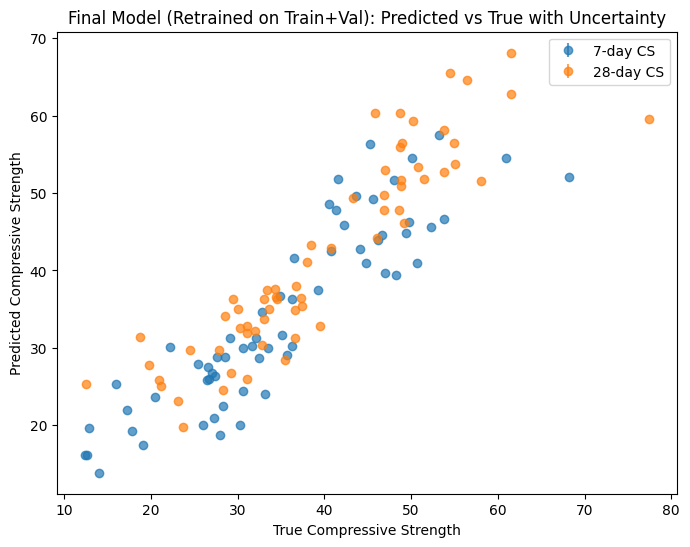

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # Convert features to a torch tensor of type float32.
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two target arrays (7-day and 28-day) and convert to tensor.
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples.
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# First split out the test set (10%), then split the remaining data into train and validation (approx. 80%/10%).
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # about 10% for validation

# Create datasets for train, validation, and test.
train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Create DataLoaders (using full-batch training).
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        # First fully connected layer with BatchNorm.
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        # Second fully connected layer with BatchNorm.
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        # Third fully connected layer with BatchNorm.
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        # Dropout layer to help prevent overfitting.
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer to predict 5 GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # Ensure positivity for some outputs.
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        # theta1 and theta2 define the mean function: m(t) = theta1 * log(t) + theta2
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        # l, sigma_f, sigma_n are GP hyperparameters; we ensure they are positive using exp.
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# Set model class and input dimension.
model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1] 

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    # Get batch size and number of time points (should be 2: 7 and 28).
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        # Mean function: m(t) = theta1 * log(t) + theta2.
        m = theta1[i] * log_t + theta2[i]
        # Compute pairwise differences of time points.
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        # Compute RBF kernel.
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # Inverse transform using the fitted target_scaler.
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            # Compute the predicted mean using the mean function: m(t) = theta1 * log(t) + theta2.
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Predict with Uncertainty
# -----------------------------------------------------------------------------
def predict_with_uncertainty(model, dataloader, t, epsilon=1e-6):
    """
    For each sample, compute the predicted mean and predictive variance.
    Predicted mean m = theta1 * log(t) + theta2.
    For each sample, compute the kernel matrix K based on predicted hyperparameters,
    then for each time point j, compute:
        var_j = K[j,j] - k_j^T * K^{-1} * k_j
    Ensure var_j is non-negative.
    """
    model.eval()
    t = t.to(device)
    all_means, all_vars, all_y = [], [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            # Compute predicted mean for each sample.
            m = theta1.unsqueeze(1) * torch.log(t + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            batch_vars = []
            for i in range(z.size(0)):
                diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t.size(0), device=t.device)
                K = K + epsilon * torch.eye(t.size(0), device=t.device)
                K_inv = torch.linalg.inv(K)
                var_sample = []
                for j in range(t.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_j = max(var_j, 0)  # Ensure non-negative variance.
                    var_sample.append(var_j)
                batch_vars.append(var_sample)
            all_means.append(m.cpu())
            all_vars.append(torch.tensor(batch_vars))
            all_y.append(y.cpu())
    m_all = torch.cat(all_means, dim=0)
    var_all = torch.cat(all_vars, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, var_all, y_all

# -----------------------------------------------------------------------------
# 8. Final Model Training with Early Stopping, then Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.01

# Fixed time vector
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Initialize final model using the improved model architecture.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)

# Train model using early stopping based on validation set performance.
model_final, best_val_r2 = train_gp_model_early_stopping(
    model_final, train_loader, val_loader, t_fixed, optimizer_final,
    num_epochs=num_epochs, patience=patience
)

# Evaluate on test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

# Inverse transform predictions and true targets to original scale.
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Early Stopping - Final Test R² for 7-day compressive strength:", r2_7_final)
print("Early Stopping - Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. (OPTIONAL) Retrain on Combined Train + Validation Set
# -----------------------------------------------------------------------------
print("\n--- Retraining on (Train + Validation) combined ---\n")

# (A) Combine train & validation data
X_train_val = np.concatenate([X_train, X_val], axis=0)
y7_train_val = np.concatenate([y7_train, y7_val], axis=0)
y28_train_val = np.concatenate([y28_train, y28_val], axis=0)

train_val_dataset = ConcreteDatasetScaled(X_train_val, y7_train_val, y28_train_val)
train_val_loader  = DataLoader(train_val_dataset, batch_size=len(train_val_dataset))
print("Train+Val dataset size:", len(train_val_dataset))

# (B) Re-initialize a fresh model with the same hyperparameters.
model_final_trainval = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final_trainval = optim.Adam(model_final_trainval.parameters(), lr=best_lr)

# (C) Define a simple training function without validation.
def train_gp_model_no_val(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Retrain Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# (D) Retrain on the merged (train+val) dataset.
model_final_trainval = train_gp_model_no_val(
    model_final_trainval,
    train_val_loader,
    t_fixed,
    optimizer_final_trainval,
    num_epochs=300  # Choose as appropriate.
)

# (E) Evaluate the retrained model on the test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final_trainval, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_cv = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_cv = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Combined Train+Val - Final Test R² for 7-day compressive strength:", r2_7_cv)
print("Combined Train+Val - Final Test R² for 28-day compressive strength:", r2_28_cv)

# -----------------------------------------------------------------------------
# 10. Visualize Test Set Results with Uncertainty (using error bars)
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# Use square root of variance as standard deviation for error bars.
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=np.sqrt(var_pred_np[:, 0]),
             fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=np.sqrt(var_pred_np[:, 1]),
             fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (Retrained on Train+Val): Predicted vs True with Uncertainty")
plt.show()


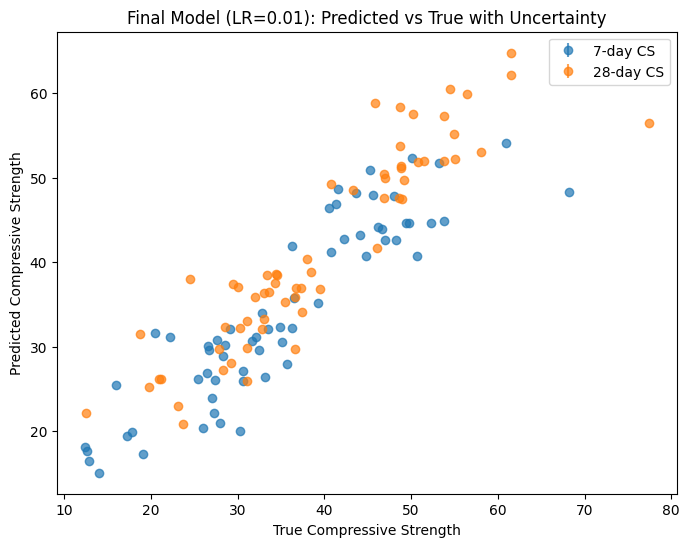

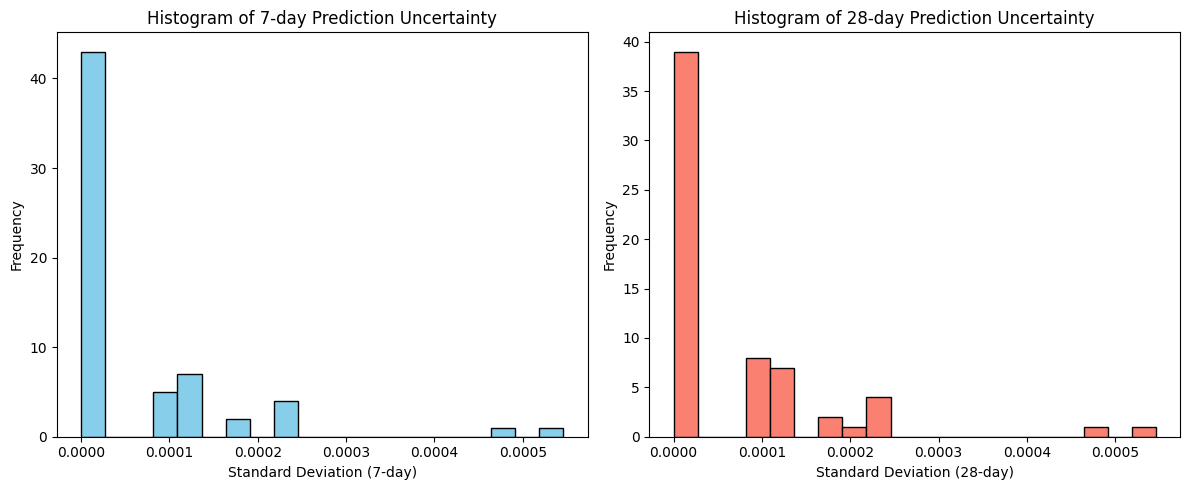

In [22]:
# -----------------------------------------------------------------------------
# Visualize Test Set Results with Uncertainty using error bars and histograms.
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# Use the square root of variance as standard deviation.
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=np.sqrt(var_pred_np[:, 0]), fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=np.sqrt(var_pred_np[:, 1]), fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()

# Additionally, plot histograms of the uncertainties for each target.
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(np.sqrt(var_pred_np[:, 0]), bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Standard Deviation (7-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 7-day Prediction Uncertainty")

plt.subplot(1,2,2)
plt.hist(np.sqrt(var_pred_np[:, 1]), bins=20, color='salmon', edgecolor='black')
plt.xlabel("Standard Deviation (28-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 28-day Prediction Uncertainty")

plt.tight_layout()
plt.show()

Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.4144, 28-day: -3.7548, Avg: -2.5846
Validation R²: 7-day: -1.1974, 28-day: -3.3172, Avg: -2.2573
Validation R²: 7-day: -1.0303, 28-day: -2.9876, Avg: -2.0089
Validation R²: 7-day: -0.8564, 28-day: -2.6469, Avg: -1.7517
Validation R²: 7-day: -0.6607, 28-day: -2.2560, Avg: -1.4583
Validation R²: 7-day: -0.4568, 28-day: -1.8308, Avg: -1.1438
Validation R²: 7-day: -0.2366, 28-day: -1.3536, Avg: -0.7951
Validation R²: 7-day: -0.0316, 28-day: -0.8809, Avg: -0.4563
Validation R²: 7-day: 0.1435, 28-day: -0.4624, Avg: -0.1595
Epoch 10/500, Training NLL Loss: 2.7314
Validation R²: 7-day: 0.2776, 28-day: -0.1263, Avg: 0.0757
Validation R²: 7-day: 0.3617, 28-day: 0.0986, Avg: 0.2301
Validation R²: 7-day: 0.4099, 28-day: 0.2627, Avg: 0.3363
Validation R²: 7-day: 0.4337, 28-day: 0.3726, Avg: 0.4032
Validation R²: 7-day: 0.4459, 28-day: 0.4481, Avg: 0.4470
Validation R²: 7-day: 0.4659

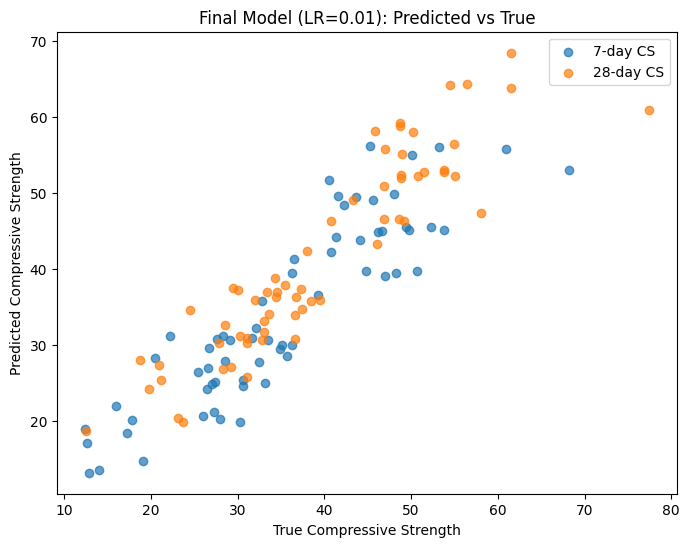

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# -----------------------------------------------------------------------------
# 假设原始目标数据存储在 targets_df 中（形状: (n_samples, 2)），先对其 fit
# -----------------------------------------------------------------------------
# 请确保 targets_df 已定义，例如：targets_df = pd.read_csv('your_target_file.csv')
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df 是原始目标数据

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # 将7天和28天的目标值组合为 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 时间向量固定为 [7.0, 28.0]
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义（例如从 CSV 中读取或其他预处理方式）
# 这里先拆分出测试集，再从剩余数据中拆分出验证集（比例大约80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch，根据数据量可调整 batch size
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: AGPModelGP_log with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_log(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_log, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)  # 输出5个参数
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# input_dim 为输入特征数量（例如，如果每个样本有22个特征，则 input_dim 为22）
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function (使用对数时间轴计算 kernel)
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    theta1, theta2: 用于均值函数 m(t) = theta1 * log(t) + theta2
    l, sigma_f, sigma_n: 用于 kernel，其中
      k(t, t') = sigma_f^2 * exp(-(log(t) - log(t'))^2 / (2 * l^2)) + sigma_n^2 * I
    t: 时间向量，形状 (2,) [7.0, 28.0]
    y: 目标值，形状 (batch_size, 2)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为2 (7, 28)
    total_nll = 0.0
    # 计算 log(t)
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        # 均值函数： m(t) = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]
        # 计算对数时间差值： diff_log = log(t) - log(t')
        diff_log = log_t.unsqueeze(0) - log_t.unsqueeze(1)
        # 对数时间轴上的 RBF kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff_log**2) / (l[i]**2))
        # 加入噪声项
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            # 均值函数： m(t) = theta1 * log(t) + theta2
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. 使用最佳 Learning Rate 0.01 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
final_epochs = 500
best_lr = 0.01

# 固定时间向量 t
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

model_final = AGPModelGP_log(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=final_epochs, patience=50)

m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.7313, 28-day: -4.4977, Avg: -3.1145
Validation R²: 7-day: -1.6526, 28-day: -4.3292, Avg: -2.9909
Validation R²: 7-day: -1.5511, 28-day: -4.0981, Avg: -2.8246
Validation R²: 7-day: -1.4441, 28-day: -3.8473, Avg: -2.6457
Validation R²: 7-day: -1.3235, 28-day: -3.5662, Avg: -2.4448
Validation R²: 7-day: -1.1844, 28-day: -3.2451, Avg: -2.2148
Validation R²: 7-day: -1.0298, 28-day: -2.8902, Avg: -1.9600
Validation R²: 7-day: -0.8639, 28-day: -2.5184, Avg: -1.6911
Validation R²: 7-day: -0.6793, 28-day: -2.1141, Avg: -1.3967
Epoch 10/300, Training NLL Loss: 3.0537
Validation R²: 7-day: -0.4894, 28-day: -1.7132, Avg: -1.1013
Validation R²: 7-day: -0.3034, 28-day: -1.3315, Avg: -0.8175
Validation R²: 7-day: -0.1178, 28-day: -0.9601, Avg: -0.5389
Validation R²: 7-day: 0.0597, 28-day: -0.6170, Avg: -0.2786
Validation R²: 7-day: 0.2219, 28-day: -0.2982, Avg: -0.0381
Validation R²: 

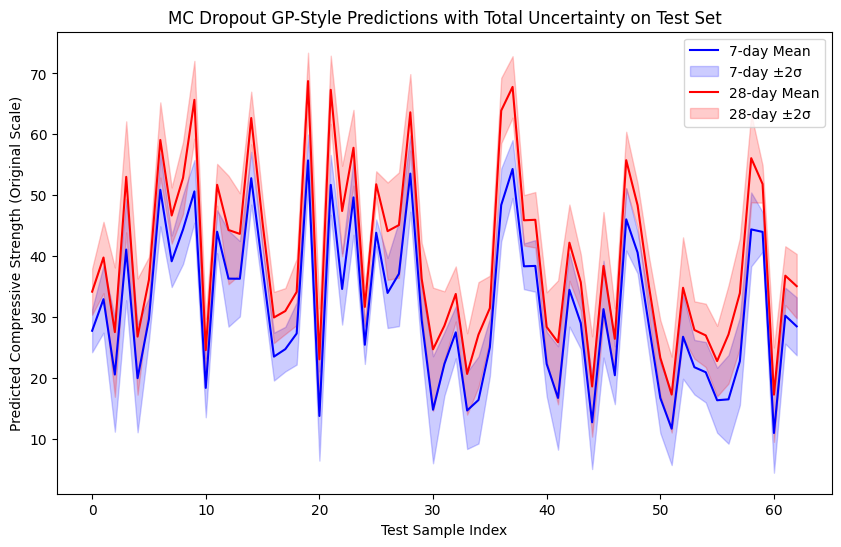

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training (adjust batch size if needed).
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):  # lower dropout
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. MC Dropout Inference for Total Uncertainty
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
      
    Note: We use the fixed time vector 't' (shape: (2,)) instead of the time tensor from the dataloader.
    """
    model.train()  # Enable dropout during inference.
    all_mc_means = []
    all_kernel_vars = []
    
    for z, _, y in dataloader:  # ignore the stacked time tensor from the dataloader
        z = z.to(device)
        t_fixed_in = t.to(device)  # use fixed time vector
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # predictive mean, shape: (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # epistemic uncertainty, shape: (n_total, n_t)
    pred_total_var = pred_epistemic_var + mc_vars  # total predictive variance
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 8. Final Model Training (Early Stopping) and Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.005  # lowered learning rate
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Initialize and train the model.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1).to(device)  # lower dropout rate
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. GP-Style Visualization: Plot Continuous Line with Shaded ±2σ Regions
# -----------------------------------------------------------------------------
x = np.arange(len(y_pred_original))

plt.figure(figsize=(10, 6))
plt.plot(x, y_pred_original[:, 0], color='blue', label='7-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 0] - 2*std_7_original,
                 y_pred_original[:, 0] + 2*std_7_original,
                 color='blue', alpha=0.2, label='7-day ±2σ')
plt.plot(x, y_pred_original[:, 1], color='red', label='28-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 1] - 2*std_28_original,
                 y_pred_original[:, 1] + 2*std_28_original,
                 color='red', alpha=0.2, label='28-day ±2σ')
                 
plt.title("MC Dropout GP-Style Predictions with Total Uncertainty on Test Set")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.legend()
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -2.5933, 28-day: -6.5550, Avg: -4.5741
Validation R²: 7-day: -2.5652, 28-day: -6.4795, Avg: -4.5224
Validation R²: 7-day: -2.5399, 28-day: -6.4168, Avg: -4.4784
Validation R²: 7-day: -2.4839, 28-day: -6.3001, Avg: -4.3920
Validation R²: 7-day: -2.4134, 28-day: -6.1550, Avg: -4.2842
Validation R²: 7-day: -2.3215, 28-day: -5.9705, Avg: -4.1460
Validation R²: 7-day: -2.2056, 28-day: -5.7407, Avg: -3.9731
Validation R²: 7-day: -2.0708, 28-day: -5.4760, Avg: -3.7734
Validation R²: 7-day: -1.9161, 28-day: -5.1742, Avg: -3.5452
Epoch 10/300, Training NLL Loss: 3.9008
Validation R²: 7-day: -1.7431, 28-day: -4.8365, Avg: -3.2898
Validation R²: 7-day: -1.5524, 28-day: -4.4675, Avg: -3.0100
Validation R²: 7-day: -1.3398, 28-day: -4.0584, Avg: -2.6991
Validation R²: 7-day: -1.1106, 28-day: -3.6132, Avg: -2.3619
Validation R²: 7-day: -0.8801, 28-day: -3.1613, Avg: -2.0207
Validation R²

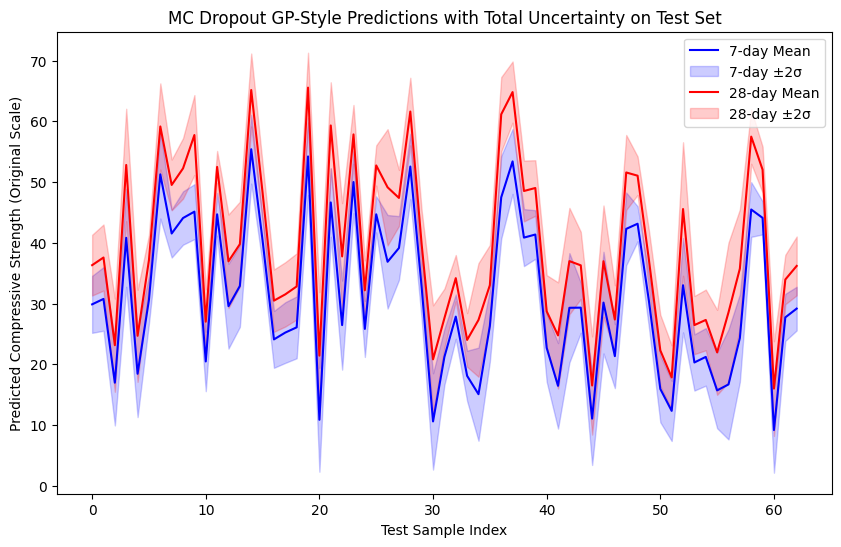

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training (adjust batch size if needed).
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):  # lower dropout
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. MC Dropout Inference for Total Uncertainty
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
      
    Note: We use the fixed time vector 't' (shape: (2,)) instead of the time tensor from the dataloader.
    """
    model.train()  # Enable dropout during inference.
    all_mc_means = []
    all_kernel_vars = []
    
    for z, _, y in dataloader:  # ignore the stacked time tensor from the dataloader
        z = z.to(device)
        t_fixed_in = t.to(device)  # use fixed time vector
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # predictive mean, shape: (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # epistemic uncertainty, shape: (n_total, n_t)
    pred_total_var = pred_epistemic_var + mc_vars  # total predictive variance
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 8. Final Model Training (Early Stopping) and Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.005  # lowered learning rate
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Initialize and train the model.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1).to(device)  # lower dropout rate
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. GP-Style Visualization: Plot Continuous Line with Shaded ±2σ Regions
# -----------------------------------------------------------------------------
x = np.arange(len(y_pred_original))

plt.figure(figsize=(10, 6))
plt.plot(x, y_pred_original[:, 0], color='blue', label='7-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 0] - 2*std_7_original,
                 y_pred_original[:, 0] + 2*std_7_original,
                 color='blue', alpha=0.2, label='7-day ±2σ')
plt.plot(x, y_pred_original[:, 1], color='red', label='28-day Mean')
plt.fill_between(x,
                 y_pred_original[:, 1] - 2*std_28_original,
                 y_pred_original[:, 1] + 2*std_28_original,
                 color='red', alpha=0.2, label='28-day ±2σ')
                 
plt.title("MC Dropout GP-Style Predictions with Total Uncertainty on Test Set")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.legend()
plt.show()


In [38]:
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted standard deviations for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted standard deviations for 28-day:", std_28_original[:10])


First 10 predicted means for 7-day: [29.865866 30.759699 16.972054 40.816853 18.441103 30.631924 51.26138
 41.52644  44.074814 45.123985]
First 10 predicted standard deviations for 7-day: [2.34471394 2.61713899 3.51997234 4.02927659 3.56725393 1.94980772
 3.63472882 1.97797893 2.195529   2.25952767]
First 10 predicted means for 28-day: [36.316505 37.573433 23.142336 52.809647 24.68792  37.146446 59.143867
 49.519596 52.24617  57.73522 ]
First 10 predicted standard deviations for 28-day: [2.49859365 2.71708101 3.83405971 4.62551846 3.79001853 2.06185822
 3.54400728 2.08860074 2.48981119 3.2855039 ]


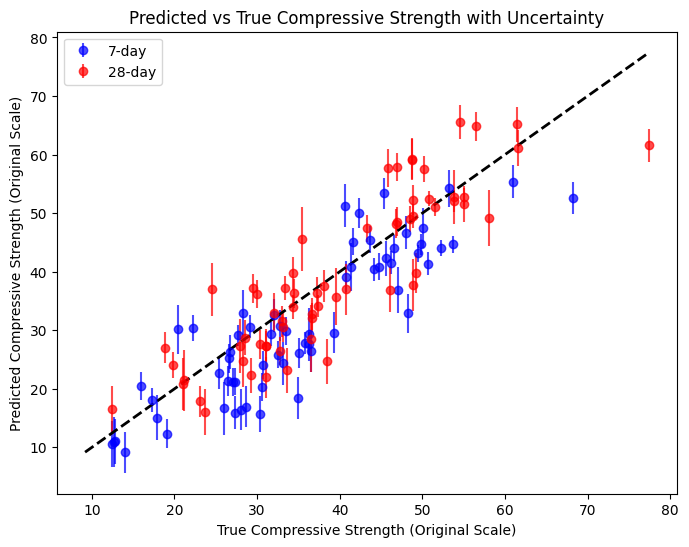

In [41]:
# Plot predicted vs true with error bars representing uncertainty

# Determine the min and max for the reference line
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
# For 7-day predictions:
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
# For 28-day predictions:
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')

# Plot the 45° reference line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


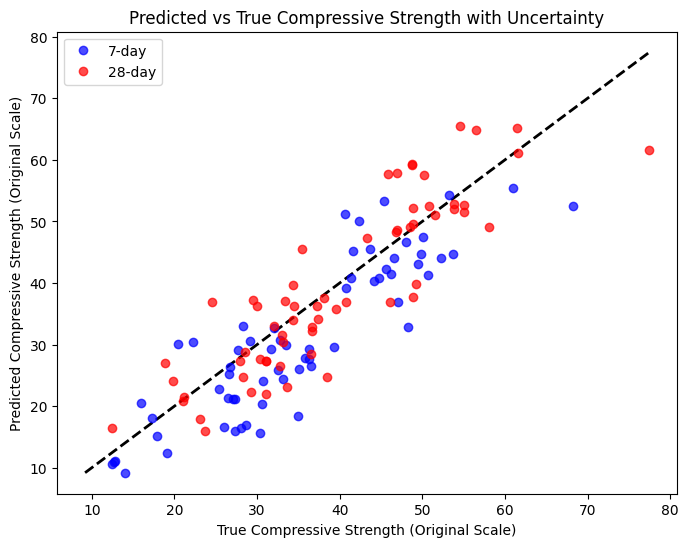

In [42]:
# Plot predicted vs true with error bars representing uncertainty

# Determine the min and max for the reference line
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
# For 7-day predictions:
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], fmt='o', label='7-day', alpha=0.7, color='blue')
# For 28-day predictions:
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], fmt='o', label='28-day', alpha=0.7, color='red')

# Plot the 45° reference line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training (adjust batch size if needed)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Hyperparameter Tuning: Grid Search
# -----------------------------------------------------------------------------
dropout_rates = [0.05, 0.1, 0.15]
learning_rates = [0.001, 0.005, 0.01]
hidden_dims_options = [[128, 64, 32], [256, 128, 64], [128, 128, 64]]
num_epochs_tune = 150   # fewer epochs for tuning
patience_tune = 20

best_val = -np.inf
best_params = None
results = []

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        for hidden_dims in hidden_dims_options:
            print(f"\nTesting dropout_rate={dropout_rate}, learning_rate={lr}, hidden_dims={hidden_dims}")
            # Initialize model with these parameters.
            model_tune = model_class(input_dim, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)
            optimizer_tune = optim.Adam(model_tune.parameters(), lr=lr)
            # Train the model using early stopping.
            model_tune, val_r2 = train_gp_model_early_stopping(model_tune, train_loader, val_loader, t_fixed, optimizer_tune, num_epochs=num_epochs_tune, patience=patience_tune)
            results.append((dropout_rate, lr, hidden_dims, val_r2))
            print("Validation R²:", val_r2)
            if val_r2 > best_val:
                best_val = val_r2
                best_params = (dropout_rate, lr, hidden_dims)
print("\nBest hyperparameters:", best_params, "with validation R²:", best_val)

# Save the best hyperparameters (or use them to retrain the final model).


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Testing dropout_rate=0.05, learning_rate=0.001, hidden_dims=[128, 64, 32]
Validation R²: 7-day: -2.1809, 28-day: -5.8427, Avg: -4.0118
Validation R²: 7-day: -2.1567, 28-day: -5.7915, Avg: -3.9741
Validation R²: 7-day: -2.1411, 28-day: -5.7598, Avg: -3.9504
Validation R²: 7-day: -2.1368, 28-day: -5.7524, Avg: -3.9446
Validation R²: 7-day: -2.1416, 28-day: -5.7638, Avg: -3.9527
Validation R²: 7-day: -2.1516, 28-day: -5.7879, Avg: -3.9698
Validation R²: 7-day: -2.1680, 28-day: -5.8244, Avg: -3.9962
Validation R²: 7-day: -2.1891, 28-day: -5.8703, Avg: -4.0297
Validation R²: 7-day: -2.2121, 28-day: -5.9199, Avg: -4.0660
Epoch 10/150, Training NLL Loss: 4.6247
Validation R²: 7-day: -2.2334, 28-day: -5.9677, Avg: -4.1005
Validation R²: 7-day: -2.2588, 28-day: -6.0235, Avg: -4.1411
Validation R²: 7-day: -2.2830, 28-day: -6.0761, Avg: -4.1796
Validation R²: 7-day: -2.3098, 28-day: -6.1324, Avg: -4.2211

In [50]:
# Assuming X_test, y_7_test, y_28_test are available and defined as in your code.
# Also assume that model_final (your tuned model) has been trained.
# 'feature_cols' is our list of feature names.

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Compute baseline performance on the test set.
m_baseline, y_baseline = evaluate_gp_model(model_final, test_loader, t_fixed)
m_baseline_np = m_baseline.numpy()
y_baseline_pred = target_scaler.inverse_transform(m_baseline_np)
y_test_np = y_baseline.numpy()
y_test_true = target_scaler.inverse_transform(y_test_np)
baseline_r2_7 = r2_score(y_test_true[:, 0], y_baseline_pred[:, 0])
baseline_r2_28 = r2_score(y_test_true[:, 1], y_baseline_pred[:, 1])
baseline_r2 = (baseline_r2_7 + baseline_r2_28) / 2
print("Baseline Test R² (average):", baseline_r2)

# Permutation importance: for each feature, shuffle it and compute the drop in R².
feature_importances = []
for i, fname in enumerate(feature_cols):
    X_test_perm = X_test.copy()
    np.random.shuffle(X_test_perm[:, i])
    
    test_dataset_perm = ConcreteDatasetScaled(X_test_perm, y_7_test, y_28_test)
    test_loader_perm = DataLoader(test_dataset_perm, batch_size=len(test_dataset_perm))
    
    m_perm, y_perm = evaluate_gp_model(model_final, test_loader_perm, t_fixed)
    m_perm_np = m_perm.numpy()
    y_perm_pred = target_scaler.inverse_transform(m_perm_np)
    y_true_perm = target_scaler.inverse_transform(y_perm.numpy())
    
    r2_7_perm = r2_score(y_true_perm[:, 0], y_perm_pred[:, 0])
    r2_28_perm = r2_score(y_true_perm[:, 1], y_perm_pred[:, 1])
    r2_perm = (r2_7_perm + r2_28_perm) / 2
    
    importance = baseline_r2 - r2_perm
    feature_importances.append((fname, importance))
    print(f"Feature: {fname}, Permuted Avg R²: {r2_perm:.4f}, Importance: {importance:.4f}")

feature_importances.sort(key=lambda x: x[1], reverse=True)
print("\nSorted Feature Importances:")
for fname, imp in feature_importances:
    print(f"{fname}: {imp:.4f}")


Baseline Test R² (average): 0.7083775401115417
Feature: SiO2, Permuted Avg R²: 0.4471, Importance: 0.2612
Feature: Al2O3, Permuted Avg R²: 0.5153, Importance: 0.1931
Feature: Fe2O3, Permuted Avg R²: 0.6348, Importance: 0.0736
Feature: CaO, Permuted Avg R²: 0.5595, Importance: 0.1489
Feature: MgO, Permuted Avg R²: 0.6637, Importance: 0.0447
Feature: Na2O, Permuted Avg R²: 0.6824, Importance: 0.0260
Feature: K2O, Permuted Avg R²: 0.6475, Importance: 0.0609
Feature: SO3, Permuted Avg R²: 0.6149, Importance: 0.0935
Feature: TiO2, Permuted Avg R²: 0.6590, Importance: 0.0494
Feature: P2O5, Permuted Avg R²: 0.7076, Importance: 0.0008
Feature: SrO, Permuted Avg R²: 0.7084, Importance: 0.0000
Feature: Mn2O3, Permuted Avg R²: 0.7000, Importance: 0.0084
Feature: LOI, Permuted Avg R²: 0.6820, Importance: 0.0264
Feature: AL/B, Permuted Avg R²: 0.5652, Importance: 0.1432
Feature: SH/SS, Permuted Avg R²: 0.5749, Importance: 0.1335
Feature: Ms, Permuted Avg R²: 0.5651, Importance: 0.1432
Feature: Ag/B

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Hyperparameter Tuning: Grid Search
# -----------------------------------------------------------------------------
dropout_rates = [0.05, 0.1, 0.15]
learning_rates = [0.001, 0.005, 0.01]
hidden_dims_options = [[128, 64, 32], [256, 128, 64], [128, 128, 64]]
num_epochs_tune = 150   # fewer epochs for tuning
patience_tune = 20

best_val = -np.inf
best_params = None
results = []

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        for hidden_dims in hidden_dims_options:
            print(f"\nTesting dropout_rate={dropout_rate}, learning_rate={lr}, hidden_dims={hidden_dims}")
            model_tune = model_class(input_dim, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)
            optimizer_tune = optim.Adam(model_tune.parameters(), lr=lr)
            model_tune, val_r2 = train_gp_model_early_stopping(model_tune, train_loader, val_loader, t_fixed, optimizer_tune, num_epochs=num_epochs_tune, patience=patience_tune)
            results.append((dropout_rate, lr, hidden_dims, val_r2))
            print("Validation R²:", val_r2)
            if val_r2 > best_val:
                best_val = val_r2
                best_params = (dropout_rate, lr, hidden_dims)
print("\nBest hyperparameters:", best_params, "with validation R²:", best_val)

# Save or note the best hyperparameters.


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Testing dropout_rate=0.05, learning_rate=0.001, hidden_dims=[128, 64, 32]
Validation R²: 7-day: -1.8000, 28-day: -5.0523, Avg: -3.4262
Validation R²: 7-day: -1.7497, 28-day: -4.9383, Avg: -3.3440
Validation R²: 7-day: -1.7020, 28-day: -4.8327, Avg: -3.2674
Validation R²: 7-day: -1.6558, 28-day: -4.7366, Avg: -3.1962
Validation R²: 7-day: -1.6116, 28-day: -4.6487, Avg: -3.1301
Validation R²: 7-day: -1.5698, 28-day: -4.5700, Avg: -3.0699
Validation R²: 7-day: -1.5312, 28-day: -4.4981, Avg: -3.0146
Validation R²: 7-day: -1.4941, 28-day: -4.4285, Avg: -2.9613
Validation R²: 7-day: -1.4549, 28-day: -4.3556, Avg: -2.9053
Epoch 10/150, Training NLL Loss: 4.3532
Validation R²: 7-day: -1.4152, 28-day: -4.2822, Avg: -2.8487
Validation R²: 7-day: -1.3737, 28-day: -4.2060, Avg: -2.7898
Validation R²: 7-day: -1.3318, 28-day: -4.1283, Avg: -2.7300
Validation R²: 7-day: -1.2872, 28-day: -4.0457, Avg: -2.6665

In [52]:
import torch
import torch.optim as optim
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assume best_params is available from the tuning code.
best_dropout, best_lr, best_hidden_dims = best_params

# Re-initialize and train the final model using the best hyperparameters.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
num_epochs_final = 300
patience_final = 50
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs_final, patience=patience_final)

# ------------------------------
# MC Dropout Inference for Total Uncertainty
# ------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
    
    Note: Uses fixed time vector 't' (shape: (2,)) rather than the dataloader's time.
    """
    model.train()  # enable dropout
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:  # ignore the stacked time tensor
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # predictive mean (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # total variance
    
    return pred_mean, pred_total_var

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Predicted vs True Plot (with Error Bars)
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Validation R²: 7-day: -1.1701, 28-day: -3.4293, Avg: -2.2997
Validation R²: 7-day: -0.9587, 28-day: -2.9471, Avg: -1.9529
Validation R²: 7-day: -0.7310, 28-day: -2.4390, Avg: -1.5850
Validation R²: 7-day: -0.4513, 28-day: -1.8282, Avg: -1.1397
Validation R²: 7-day: -0.1619, 28-day: -1.1828, Avg: -0.6724
Validation R²: 7-day: 0.0729, 28-day: -0.6272, Avg: -0.2771
Validation R²: 7-day: 0.1848, 28-day: -0.2646, Avg: -0.0399
Validation R²: 7-day: 0.1629, 28-day: -0.1100, Avg: 0.0265
Validation R²: 7-day: 0.0407, 28-day: -0.1191, Avg: -0.0392
Epoch 10/300, Training NLL Loss: 2.8212
Validation R²: 7-day: -0.1113, 28-day: -0.2059, Avg: -0.1586
Validation R²: 7-day: -0.2742, 28-day: -0.3326, Avg: -0.3034
Validation R²: 7-day: -0.4306, 28-day: -0.4698, Avg: -0.4502
Validation R²: 7-day: -0.5559, 28-day: -0.5867, Avg: -0.5713
Validation R²: 7-day: -0.5326, 28-day: -0.5583, Avg: -0.5455
Validation R²: 7-day: -0.4747, 28-day: -0.4930, Avg: -0.4838
Validation R²: 7-day: -0.4434, 28-day: -0.4414, Av

In [53]:

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:50, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:50])
print("First 10 predicted means for 28-day:", y_pred_original[:50, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:50])


First 10 predicted means for 7-day: [28.131134  34.557365  16.513168  38.45645   25.520586  28.17295
 52.683086  42.473167  45.524998  45.418446  18.592875  46.183517
 36.543182  35.499954  61.97962   38.58993   21.351818  26.431519
 25.58797   59.72985    8.694903  48.46137   29.86737   48.057755
 24.212505  47.94768   36.659657  41.903797  59.330784  26.448967
 11.401675  23.070942  27.426947  16.648855  10.536395  26.531898
 51.900707  57.857872  40.564198  40.24887   22.75812    7.9900236
 31.914566  31.91627   10.597974  17.62576   23.68982   41.584724
 45.453358  31.235342 ]
First 10 predicted std dev for 7-day: [1.2451251  1.79949394 2.11807721 1.8085799  1.91232033 1.24328545
 2.14844597 1.38781854 1.86007925 1.79701102 1.6997217  1.46247261
 1.69454586 1.49506814 2.19567218 1.77203746 1.24908134 0.81378626
 2.45037075 2.61491656 1.64647347 1.55536803 1.57920944 2.06214359
 1.82285691 1.3941906  2.20904238 1.82182519 2.52950119 2.30894174
 1.99795489 1.67815978 0.83954642 1.142

#add L2 below

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# Assume targets_df is a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)  # fixed time vector
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training (adjust batch size if needed)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128, 64], dropout_rate=0.05):  # best hyperparams
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # ensures theta1 > 0
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # expected to be 2
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=300, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/300, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. MC Dropout Inference for Total Uncertainty
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
    
    Note: Uses fixed time vector 't' (shape: (2,)) instead of the dataloader's time.
    """
    model.train()  # enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in test_loader:  # ignore the stacked time tensor
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # predictive mean (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # total predictive variance
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 8. Final Model Training and Evaluation on Test Set using Best Hyperparameters
# -----------------------------------------------------------------------------
best_dropout, best_lr, best_hidden_dims = (0.05, 0.01, [256, 128, 64])
weight_decay = 1e-4

model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr, weight_decay=weight_decay)
num_epochs_final = 600
patience_final = 50
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs_final, patience=patience_final)

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)
# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Predicted vs True Plot (with Error Bars)
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.1715, 28-day: -3.2258, Avg: -2.1986
Validation R²: 7-day: -0.6089, 28-day: -2.0008, Avg: -1.3049
Validation R²: 7-day: -0.2931, 28-day: -1.2493, Avg: -0.7712
Validation R²: 7-day: -0.0223, 28-day: -0.6202, Avg: -0.3213
Validation R²: 7-day: 0.1484, 28-day: -0.1842, Avg: -0.0179
Validation R²: 7-day: 0.1826, 28-day: 0.0046, Avg: 0.0936
Validation R²: 7-day: 0.2256, 28-day: 0.1356, Avg: 0.1806
Validation R²: 7-day: 0.2778, 28-day: 0.2189, Avg: 0.2484
Validation R²: 7-day: 0.3231, 28-day: 0.3007, Avg: 0.3119
Epoch 10/300, Training NLL Loss: 1.8357
Validation R²: 7-day: 0.4049, 28-day: 0.4114, Avg: 0.4082
Validation R²: 7-day: 0.5079, 28-day: 0.4975, Avg: 0.5027
Validation R²: 7-day: 0.5637, 28-day: 0.5729, Avg: 0.5683
Validation R²: 7-day: 0.5943, 28-day: 0.6248, Avg: 0.6096
Validation R²: 7-day: 0.5887, 28-day: 0.6253, Avg: 0.6070
Validation R²: 7-day: 0.6120, 28-day: 0.6

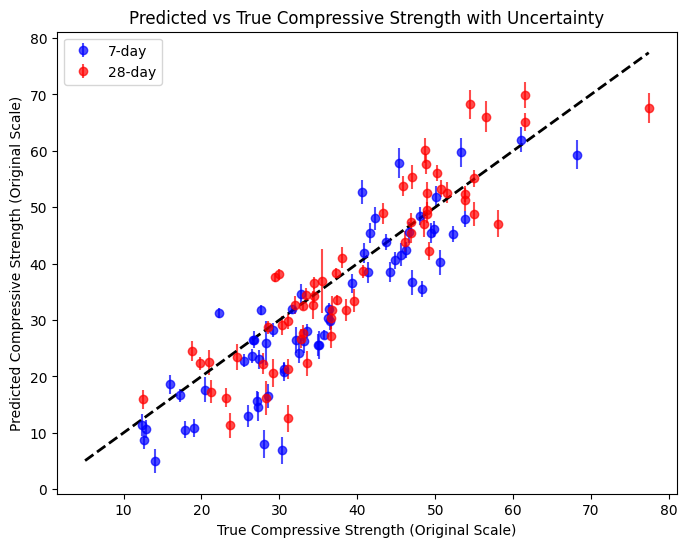

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true_original, y_pred_original, std_7_original, and std_28_original are available from the tuning code.

# Determine the min and max values (for the 45° reference line)
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
# Plot 7-day predictions with error bars
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
# Plot 28-day predictions with error bars
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')

# Plot the 45° reference line.
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Preprocessing: Fit the target scaler on original targets.
# targets_df is the original target data with shape (n_samples, 2)
# ------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # Fit scaler on the original target data

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack targets (7-day and 28-day) and convert to a tensor
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# First split out the test set, then split the remaining data into train and validation (~80%/10%/10%)
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # about 10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Create DataLoaders (using full-batch for simplicity)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        # First layer with BatchNorm
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        # Second layer with BatchNorm
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        # Third layer with BatchNorm
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer for 5 GP parameters
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        # theta1 and theta2 form the mean function: m(t)=theta1*log(t)+theta2
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        # Other GP hyperparameters, ensured to be positive via exp.
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]  # e.g., 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Should be 2 ([7, 28])
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5*(diff**2)/(l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Predict with Uncertainty Function
# -----------------------------------------------------------------------------
def predict_with_uncertainty(model, dataloader, t, epsilon=1e-6):
    """
    For each sample, compute the predicted mean and predictive variance.
    Predicted mean: m = theta1 * log(t) + theta2.
    For each sample, compute the kernel matrix K based on predicted hyperparameters,
    then for each time point j, compute:
        var_j = K[j,j] - k_j^T * K^{-1} * k_j
    Ensure that var_j is non-negative.
    """
    model.eval()
    t = t.to(device)
    all_means, all_vars, all_y = [], [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            batch_vars = []
            for i in range(z.size(0)):
                diff = t.unsqueeze(0) - t.unsqueeze(1)  # (n_t, n_t)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t.size(0), device=t.device)
                K = K + epsilon * torch.eye(t.size(0), device=t.device)
                K_inv = torch.linalg.inv(K)
                var_sample = []
                for j in range(t.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_j = max(var_j, 0)
                    var_sample.append(var_j)
                batch_vars.append(var_sample)
            all_means.append(m.cpu())
            all_vars.append(torch.tensor(batch_vars))
            all_y.append(y.cpu())
    m_all = torch.cat(all_means, dim=0)
    var_all = torch.cat(all_vars, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, var_all, y_all

# -----------------------------------------------------------------------------
# 8. Final Model Training with LR = 0.01 and Early Stopping, then Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 500
patience = 50
best_lr = 0.01

# Initialize final model using the improved architecture.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use predict_with_uncertainty on the test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

# Inverse transform predictions and true targets to original scale.
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# Print out uncertainty values for the first few samples (in original scale)
# -----------------------------------------------------------------------------
# Convert variance from scaled space to original space: var_orig = (scale^2)*var_scaled
scale_factors = target_scaler.scale_  # This is a 1D array with 2 elements
print("Predicted uncertainty (standard deviation in original scale) for first 5 samples:")
for i in range(min(5, var_pred_np.shape[0])):
    std_7 = scale_factors[0] * np.sqrt(var_pred_np[i, 0])
    std_28 = scale_factors[1] * np.sqrt(var_pred_np[i, 1])
    print(f"Sample {i+1}: 7-day std: {std_7:.4f}, 28-day std: {std_28:.4f}")

# -----------------------------------------------------------------------------
# Visualize Test Set Results with Uncertainty using error bars and histograms.
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# For error bars, convert the uncertainty to original scale:
error_7 = scale_factors[0] * np.sqrt(var_pred_np[:, 0])
error_28 = scale_factors[1] * np.sqrt(var_pred_np[:, 1])
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=error_7, fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=error_28, fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()

# Additionally, plot histograms of the uncertainties (standard deviations in original scale)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(error_7, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Standard Deviation (7-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 7-day Prediction Uncertainty")
plt.subplot(1,2,2)
plt.hist(error_28, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Standard Deviation (28-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 28-day Prediction Uncertainty")
plt.tight_layout()
plt.show()


NameError: name 'targets_df' is not defined

##MC dropout both start

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation and Preprocessing
# =============================================================================
# Assume that X_scaled, y_7_scaled, y_28_scaled, and targets_df are already available.

# Fit the target scaler on the original targets.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# Set up the device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset Definition.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two targets into a 2D tensor (n_samples x 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for prediction (e.g., 7-day and 28-day)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Data Split into Train, Validation, and Test sets.
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # ~10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training for each dataset.
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# =============================================================================
# 1. Model Definition: Improved AGP Model (AGPModelGP_v2)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer produces 5 outputs, which will be processed into GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        # Use Softplus to ensure theta1 remains positive.
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    Calculates the negative log likelihood for the GP given the model parameters.
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Expected to be 2 (e.g., 7-day and 28-day)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. Modified Evaluation Function Using MC Dropout for Tuning
# =============================================================================
def evaluate_gp_model_mc(model, dataloader, t, num_samples=10, epsilon=1e-6):
    """
    Evaluate the model using MC Dropout.
    For each batch, run multiple forward passes and average the predictions.
    Returns the averaged predictions and the true labels.
    """
    model.train()  # Ensure dropout is enabled during inference
    all_mc_means = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z = z.to(device)
            t_fixed_in = t.to(device)
            mc_sample_means = []
            for _ in range(num_samples):
                theta1, theta2, _, _, _ = model(z)
                m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
                mc_sample_means.append(m)
            # Average the multiple MC samples to get the final prediction.
            mc_means = torch.mean(torch.stack(mc_sample_means, dim=0), dim=0)
            all_mc_means.append(mc_means.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_mc_means, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# =============================================================================
# 4. Modified Training Function with Early Stopping (Using MC Dropout Evaluation)
# =============================================================================
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50, num_eval_samples=10):
    """
    Train the GP model with early stopping. The validation evaluation uses MC Dropout.
    """
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on the validation set using MC Dropout.
        m_val, y_val = evaluate_gp_model_mc(model, val_loader, t, num_samples=num_eval_samples)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # Inverse transform to original scale.
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

# =============================================================================
# 5. Hyperparameter Tuning: Grid Search (Using MC Dropout Evaluation)
# =============================================================================
dropout_rates = [0.05, 0.1, 0.15]
learning_rates = [0.001, 0.005, 0.01]
hidden_dims_options = [[128, 64, 32], [256, 128, 64], [128, 128, 64]]
num_epochs_tune = 150   # Use fewer epochs during hyperparameter tuning.
patience_tune = 20

best_val = -np.inf
best_params = None
results = []

# Fixed time vector.
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        for hidden_dims in hidden_dims_options:
            print(f"\nTesting dropout_rate={dropout_rate}, learning_rate={lr}, hidden_dims={hidden_dims}")
            model_tune = model_class(input_dim, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)
            optimizer_tune = optim.Adam(model_tune.parameters(), lr=lr)
            model_tune, val_r2 = train_gp_model_early_stopping(
                model_tune, train_loader, val_loader, t_fixed, optimizer_tune, 
                num_epochs=num_epochs_tune, patience=patience_tune, num_eval_samples=10)
            results.append((dropout_rate, lr, hidden_dims, val_r2))
            print("Validation R²:", val_r2)
            if val_r2 > best_val:
                best_val = val_r2
                best_params = (dropout_rate, lr, hidden_dims)
print("\nBest hyperparameters:", best_params, "with validation R²:", best_val)


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Testing dropout_rate=0.05, learning_rate=0.001, hidden_dims=[128, 64, 32]
Validation R²: 7-day: -2.3841, 28-day: -5.5917, Avg: -3.9879
Validation R²: 7-day: -2.2265, 28-day: -5.2692, Avg: -3.7478
Validation R²: 7-day: -2.1371, 28-day: -5.1327, Avg: -3.6349
Validation R²: 7-day: -2.0731, 28-day: -5.0041, Avg: -3.5386
Validation R²: 7-day: -2.1083, 28-day: -5.0182, Avg: -3.5633
Validation R²: 7-day: -1.9474, 28-day: -4.7615, Avg: -3.3544
Validation R²: 7-day: -1.9530, 28-day: -4.7289, Avg: -3.3410
Validation R²: 7-day: -1.8400, 28-day: -4.4728, Avg: -3.1564
Validation R²: 7-day: -1.9817, 28-day: -4.6951, Avg: -3.3384
Epoch 10/150, Training NLL Loss: 4.0017
Validation R²: 7-day: -1.8898, 28-day: -4.5142, Avg: -3.2020
Validation R²: 7-day: -1.8368, 28-day: -4.4005, Avg: -3.1186
Validation R²: 7-day: -1.8486, 28-day: -4.4190, Avg: -3.1338
Validation R²: 7-day: -1.7501, 28-day: -4.2339, Avg: -2.9920

In [17]:
# =============================================================================
# -----------------------------------------------------------------------------
# >>>>> Train and on test data <<<<<
# -----------------------------------------------------------------------------
# =============================================================================

# Assume best_params is available from the tuning code.
best_dropout, best_lr, best_hidden_dims = best_params

# Re-initialize and train the final model using the best hyperparameters.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
num_epochs_final = 300
patience_final = 50
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs_final, patience=patience_final, num_eval_samples=10)

# =============================================================================
# MC Dropout Inference for Total Uncertainty on Test Set
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Runs multiple forward passes with dropout enabled (MC dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
    
    Note: Uses fixed time vector 't' (shape: (2,)) rather than the dataloader's time.
    """
    model.train()  # enable dropout
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:  # ignore the stacked time tensor
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # shape: (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)    # shape: (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # shape: (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # shape: (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # shape: (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # predictive mean (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # total variance
    
    return pred_mean, pred_total_var

# Use MC dropout prediction on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# mc_mean and mc_var are in scaled space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# =============================================================================
# Predicted vs True Plot (with Error Bars)
# =============================================================================
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Validation R²: 7-day: -0.1401, 28-day: -1.5070, Avg: -0.8236
Validation R²: 7-day: 0.1912, 28-day: -0.5749, Avg: -0.1918
Validation R²: 7-day: 0.2414, 28-day: -0.1970, Avg: 0.0222
Validation R²: 7-day: 0.2729, 28-day: 0.0522, Avg: 0.1625
Validation R²: 7-day: 0.3093, 28-day: 0.2590, Avg: 0.2842
Validation R²: 7-day: 0.3510, 28-day: 0.4221, Avg: 0.3866
Validation R²: 7-day: 0.3807, 28-day: 0.5268, Avg: 0.4538
Validation R²: 7-day: 0.3659, 28-day: 0.5712, Avg: 0.4686
Validation R²: 7-day: 0.3919, 28-day: 0.6137, Avg: 0.5028
Epoch 10/300, Training NLL Loss: 2.4844
Validation R²: 7-day: 0.3740, 28-day: 0.6489, Avg: 0.5115
Validation R²: 7-day: 0.3877, 28-day: 0.6460, Avg: 0.5168
Validation R²: 7-day: 0.4366, 28-day: 0.6597, Avg: 0.5481
Validation R²: 7-day: 0.4804, 28-day: 0.6482, Avg: 0.5643
Validation R²: 7-day: 0.5462, 28-day: 0.6624, Avg: 0.6043
Validation R²: 7-day: 0.5977, 28-day: 0.6702, Avg: 0.6340
Validation R²: 7-day: 0.5981, 28-day: 0.6616, Avg: 0.6299
Validation R²: 7-day: 0.60

Using device: cuda
Train dataset size: 504
Test dataset size: 126
Epoch 10/300, Training NLL Loss: 3.3954
Epoch 20/300, Training NLL Loss: 2.7393
Epoch 30/300, Training NLL Loss: 2.1354
Epoch 40/300, Training NLL Loss: 1.7462
Epoch 50/300, Training NLL Loss: 1.4232
Epoch 60/300, Training NLL Loss: 1.1954
Epoch 70/300, Training NLL Loss: 0.9898
Epoch 80/300, Training NLL Loss: 0.8551
Epoch 90/300, Training NLL Loss: 0.7766
Epoch 100/300, Training NLL Loss: 0.7083
Epoch 110/300, Training NLL Loss: 0.6422
Epoch 120/300, Training NLL Loss: 0.5396
Epoch 130/300, Training NLL Loss: 0.5427
Epoch 140/300, Training NLL Loss: 0.5261
Epoch 150/300, Training NLL Loss: 0.4856
Epoch 160/300, Training NLL Loss: 0.4967
Epoch 170/300, Training NLL Loss: 0.3931
Epoch 180/300, Training NLL Loss: 0.3649
Epoch 190/300, Training NLL Loss: 0.4117
Epoch 200/300, Training NLL Loss: 0.2513
Epoch 210/300, Training NLL Loss: 0.3369
Epoch 220/300, Training NLL Loss: 0.3020
Epoch 230/300, Training NLL Loss: 0.2443


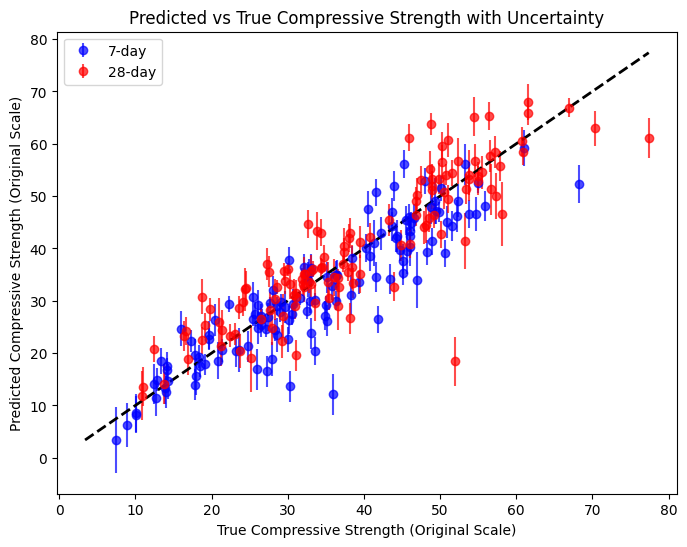

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation and Preprocessing
# =============================================================================
# Assume that X_scaled, y_7_scaled, y_28_scaled, and targets_df are already available.

# Fit the target scaler on the original targets.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# Set up the device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset Definition.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two targets into a 2D tensor (n_samples x 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for prediction (e.g., 7-day and 28-day)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# =============================================================================
# Split the dataset into 80% training and 20% testing.
# =============================================================================
X_train, X_test, y7_train, y7_test, y28_train, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch training for both training and test datasets.
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# =============================================================================
# 1. Model Definition: Improved AGP Model (AGPModelGP_v2)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer produces 5 outputs, which are transformed into GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        # Softplus activation ensures theta1 is positive.
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    Calculates the negative log likelihood for the GP using the model parameters.
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Expected to be 2 (e.g., 7-day and 28-day predictions)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Evaluation Function for Inference
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    """
    Performs multiple forward passes with dropout enabled (MC Dropout) and returns:
      - pred_mean: predictive mean averaged over samples (n_data, n_t)
      - pred_total_var: total predictive variance (epistemic + GP kernel) (n_data, n_t)
    Note: Uses a fixed time vector 't' (shape: (2,)).
    """
    model.train()  # Enable dropout at inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Calculate kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # Shape: (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, n_total, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (n_total, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean (n_total, n_t)
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Training Loop (No separate validation set)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    """
    Train the GP model for a fixed number of epochs using the training set only.
    """
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Training and Final Evaluation on Test Set
# =============================================================================
# Set hyperparameters (you can adjust these as needed)
best_dropout = 0.1
best_lr = 0.005
best_hidden_dims = [128, 64, 32]

# Re-initialize and train the final model using the chosen hyperparameters.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Train the model for a fixed number of epochs.
model_final = train_gp_model(model_final, train_loader, t_fixed, optimizer_final, num_epochs=300)

# =============================================================================
# Final MC Dropout Inference on Test Set
# =============================================================================
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# Convert predictions from scaled to original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# =============================================================================
# Predicted vs True Plot (with Error Bars)
# =============================================================================
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation and Preprocessing
# =============================================================================
# Assume that X_scaled, y_7_scaled, y_28_scaled, and targets_df are already available.

# Fit the target scaler on the original targets.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# Set up the device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset Definition.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two targets into a 2D tensor (n_samples x 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for prediction (e.g., 7-day and 28-day)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# =============================================================================
# Split the dataset into 80% training and 20% testing.
# =============================================================================
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# Further split the full training set into train and validation (90/10 split).
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_train_full, y7_train_full, y28_train_full, test_size=0.1, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)

# Use full-batch loaders for tuning.
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))

print("Tuning - Train dataset size:", len(train_dataset))
print("Tuning - Validation dataset size:", len(val_dataset))

# =============================================================================
# 1. Model Definition: Improved AGP Model (AGPModelGP_v2)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer produces 5 outputs, which are transformed into GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        # Softplus activation ensures theta1 is positive.
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    Calculates the negative log likelihood for the GP using the model parameters.
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Expected to be 2 (e.g., 7-day and 28-day predictions)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size   

# =============================================================================
# 3. MC Dropout Evaluation Function for Tuning
# =============================================================================
def evaluate_gp_model_mc(model, dataloader, t, num_samples=10, epsilon=1e-6):
    """
    Evaluate the model using MC Dropout by averaging multiple forward passes.
    Returns the averaged predictions and true labels.
    """
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z = z.to(device)
            t_fixed = t.to(device)
            mc_sample_means = []
            for _ in range(num_samples):
                theta1, theta2, _, _, _ = model(z)
                m = theta1.unsqueeze(1) * torch.log(t_fixed + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
                mc_sample_means.append(m)
            # Average the multiple MC samples.
            mc_means = torch.mean(torch.stack(mc_sample_means, dim=0), dim=0)
            all_mc_means.append(mc_means.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_mc_means, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# =============================================================================
# 4. Training Function with Early Stopping (Using MC Dropout Evaluation)
# =============================================================================
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=150, patience=20, num_eval_samples=10):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on the validation set using MC Dropout.
        m_val, y_val = evaluate_gp_model_mc(model, val_loader, t, num_samples=num_eval_samples)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # Inverse transform to the original scale.
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

# =============================================================================
# 5. Hyperparameter Tuning: Grid Search (Using MC Dropout Evaluation)
# =============================================================================
dropout_rates = [0.05, 0.1, 0.15]
learning_rates = [0.001, 0.005, 0.01]
hidden_dims_options = [[128, 64, 32], [256, 128, 64], [128, 128, 64]]

best_val = -np.inf
best_params = None
results = []

# Fixed time vector.
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        for hidden_dims in hidden_dims_options:
            print(f"\nTesting dropout_rate={dropout_rate}, learning_rate={lr}, hidden_dims={hidden_dims}")
            model_tune = model_class(input_dim, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)
            optimizer_tune = optim.Adam(model_tune.parameters(), lr=lr)
            model_tune, val_r2 = train_gp_model_early_stopping(
                model_tune, train_loader, val_loader, t_fixed, optimizer_tune,
                num_epochs=150, patience=20, num_eval_samples=10)
            results.append((dropout_rate, lr, hidden_dims, val_r2))
            print("Validation R²:", val_r2)
            if val_r2 > best_val:
                best_val = val_r2
                best_params = (dropout_rate, lr, hidden_dim s)
print("\nBest hyperparameters:", best_params, "with validation R²:", best_val)


Using device: cuda
Tuning - Train dataset size: 453
Tuning - Validation dataset size: 51

Testing dropout_rate=0.05, learning_rate=0.001, hidden_dims=[128, 64, 32]
Validation R²: 7-day: -0.4755, 28-day: -2.2444, Avg: -1.3600
Validation R²: 7-day: -0.3143, 28-day: -1.9981, Avg: -1.1562
Validation R²: 7-day: -0.1921, 28-day: -1.7721, Avg: -0.9821
Validation R²: 7-day: -0.0659, 28-day: -1.5463, Avg: -0.8061
Validation R²: 7-day: 0.0231, 28-day: -1.3919, Avg: -0.6844
Validation R²: 7-day: 0.0832, 28-day: -1.2747, Avg: -0.5958
Validation R²: 7-day: 0.1199, 28-day: -1.2147, Avg: -0.5474
Validation R²: 7-day: 0.1525, 28-day: -1.1570, Avg: -0.5022
Validation R²: 7-day: 0.2066, 28-day: -1.0018, Avg: -0.3976
Epoch 10/150, Training NLL Loss: 3.4189
Validation R²: 7-day: 0.2470, 28-day: -0.9100, Avg: -0.3315
Validation R²: 7-day: 0.2486, 28-day: -0.8504, Avg: -0.3009
Validation R²: 7-day: 0.2935, 28-day: -0.7632, Avg: -0.2348
Validation R²: 7-day: 0.3182, 28-day: -0.6843, Avg: -0.1830
Validation R

Final Training dataset size: 504
Final Test dataset size: 126
Epoch 10/300, Training NLL Loss: 3.1721
Epoch 20/300, Training NLL Loss: 2.2518
Epoch 30/300, Training NLL Loss: 1.6806
Epoch 40/300, Training NLL Loss: 1.5861
Epoch 50/300, Training NLL Loss: 1.2896
Epoch 60/300, Training NLL Loss: 1.1030
Epoch 70/300, Training NLL Loss: 0.8705
Epoch 80/300, Training NLL Loss: 0.7842
Epoch 90/300, Training NLL Loss: 0.6394
Epoch 100/300, Training NLL Loss: 0.6200
Epoch 110/300, Training NLL Loss: 0.4882
Epoch 120/300, Training NLL Loss: 0.4598
Epoch 130/300, Training NLL Loss: 0.4386
Epoch 140/300, Training NLL Loss: 0.3575
Epoch 150/300, Training NLL Loss: 0.3883
Epoch 160/300, Training NLL Loss: 0.3669
Epoch 170/300, Training NLL Loss: 0.2824
Epoch 180/300, Training NLL Loss: 0.2809
Epoch 190/300, Training NLL Loss: 0.2348
Epoch 200/300, Training NLL Loss: 0.2194
Epoch 210/300, Training NLL Loss: 0.2039
Epoch 220/300, Training NLL Loss: 0.1964
Epoch 230/300, Training NLL Loss: 0.2007
Epoc

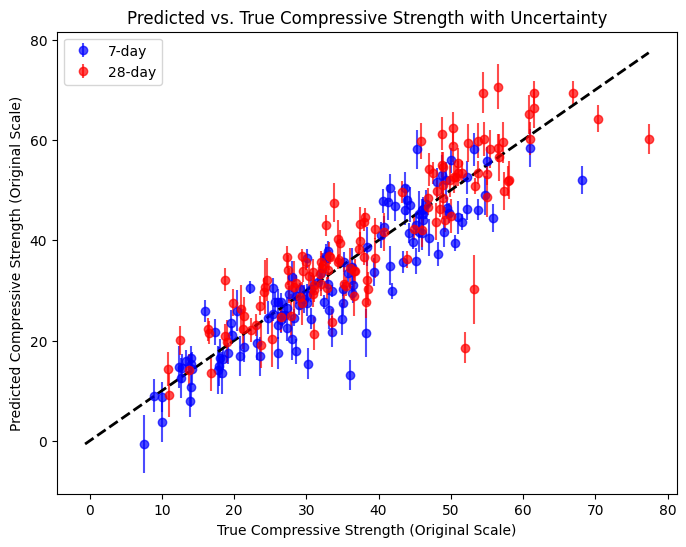

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 0. Data Preparation for Final Training and Testing
# -----------------------------------------------------------------------------
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# We use the previously defined split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# Use the same dataset class.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
test_dataset = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch loaders.
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Final Training dataset size:", len(train_dataset_full))
print("Final Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 1. Model Definition (Same as before)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 2. GP Negative Log Likelihood Loss Function (Same as tuning)
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 3. Training Loop Function (No validation)
# -----------------------------------------------------------------------------
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# -----------------------------------------------------------------------------
# 4. MC Dropout Inference Function for Testing (Same as tuning)
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 5. Final Training and Testing on the Held-out Test Set
# -----------------------------------------------------------------------------
# Best hyperparameters from tuning (example values).
best_dropout = 0.1
best_lr = 0.005
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=300)

# Perform MC Dropout inference on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from the scaled space to the original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


#add L2

#further zoom in

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation and Preprocessing
# =============================================================================
# Assume that X_scaled, y_7_scaled, y_28_scaled, and targets_df are already available.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset Definition.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two targets into a 2D tensor (n_samples x 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for prediction (e.g., 7-day and 28-day)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# =============================================================================
# Split the dataset into 80% training and 20% testing, then further split training into train/val.
# =============================================================================
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_train_full, y7_train_full, y28_train_full, test_size=0.1, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)

# Use full-batch loaders for tuning.
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))

print("Tuning - Train dataset size:", len(train_dataset))
print("Tuning - Validation dataset size:", len(val_dataset))

# =============================================================================
# 1. Model Definition: Improved AGP Model (AGPModelGP_v2)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer produces 5 outputs, which are transformed into GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        # Softplus activation ensures theta1 is positive.
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Expected to be 2 (e.g., 7-day and 28-day predictions)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Evaluation Function for Tuning
# =============================================================================
def evaluate_gp_model_mc(model, dataloader, t, num_samples=10, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z = z.to(device)
            t_fixed = t.to(device)
            mc_sample_means = []
            for _ in range(num_samples):
                theta1, theta2, _, _, _ = model(z)
                m = theta1.unsqueeze(1) * torch.log(t_fixed + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
                mc_sample_means.append(m)
            # Average the multiple MC samples.
            mc_means = torch.mean(torch.stack(mc_sample_means, dim=0), dim=0)
            all_mc_means.append(mc_means.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_mc_means, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# =============================================================================
# 4. Training Function with Early Stopping (Using MC Dropout Evaluation)
# =============================================================================
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=150, patience=20, num_eval_samples=10):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        m_val, y_val = evaluate_gp_model_mc(model, val_loader, t, num_samples=num_eval_samples)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

# =============================================================================
# 5. Hyperparameter Tuning: Grid Search (No Weight Decay)
# =============================================================================
dropout_rates = [0.13, 0.15, 0.17]
learning_rates = [0.0075, 0.01, 0.0125]
hidden_dims_options = [[256, 128, 64], [256, 128, 96], [256, 128, 32]]

best_val = -np.inf
best_params = None
results = []

# Fixed time vector.
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        for hidden_dims in hidden_dims_options:
            print(f"\nTesting dropout={dropout_rate}, LR={lr}, Hidden={hidden_dims}")
            model_tune = model_class(input_dim, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)
            optimizer_tune = optim.Adam(model_tune.parameters(), lr=lr)  # No weight_decay here.
            model_tune, val_r2 = train_gp_model_early_stopping(
                model_tune, train_loader, val_loader, t_fixed, optimizer_tune,
                num_epochs=150, patience=20, num_eval_samples=10)
            results.append((dropout_rate, lr, hidden_dims, val_r2))
            print("Validation R²:", val_r2)
            if val_r2 > best_val:
                best_val = val_r2
                best_params = (dropout_rate, lr, hidden_dims)

print("\nBest hyperparameters:", best_params, "with validation R²:", best_val)


Using device: cuda
Tuning - Train dataset size: 453
Tuning - Validation dataset size: 51

Testing dropout=0.13, LR=0.0075, Hidden=[256, 128, 64]
Validation R²: 7-day: 0.0214, 28-day: -0.7978, Avg: -0.3882
Validation R²: 7-day: 0.1577, 28-day: -0.1323, Avg: 0.0127
Validation R²: 7-day: 0.1619, 28-day: 0.1370, Avg: 0.1495
Validation R²: 7-day: 0.1719, 28-day: 0.3069, Avg: 0.2394
Validation R²: 7-day: 0.1022, 28-day: 0.4064, Avg: 0.2543
Validation R²: 7-day: -0.0770, 28-day: 0.3242, Avg: 0.1236
Validation R²: 7-day: -0.2712, 28-day: 0.1742, Avg: -0.0485
Validation R²: 7-day: -0.4149, 28-day: 0.0671, Avg: -0.1739
Validation R²: 7-day: -0.4197, 28-day: 0.0494, Avg: -0.1851
Epoch 10/150, Training NLL Loss: 2.5426
Validation R²: 7-day: -0.3019, 28-day: 0.1557, Avg: -0.0731
Validation R²: 7-day: -0.1830, 28-day: 0.2479, Avg: 0.0324
Validation R²: 7-day: -0.1031, 28-day: 0.2743, Avg: 0.0856
Validation R²: 7-day: -0.0294, 28-day: 0.2939, Avg: 0.1323
Validation R²: 7-day: 0.0986, 28-day: 0.3844, 

Final Training dataset size: 504
Final Test dataset size: 126
Epoch 10/500, Training NLL Loss: 2.7923
Epoch 20/500, Training NLL Loss: 1.7508
Epoch 30/500, Training NLL Loss: 1.3270
Epoch 40/500, Training NLL Loss: 1.0381
Epoch 50/500, Training NLL Loss: 0.8125
Epoch 60/500, Training NLL Loss: 0.7498
Epoch 70/500, Training NLL Loss: 0.5486
Epoch 80/500, Training NLL Loss: 0.4922
Epoch 90/500, Training NLL Loss: 0.3749
Epoch 100/500, Training NLL Loss: 0.4399
Epoch 110/500, Training NLL Loss: 0.3559
Epoch 120/500, Training NLL Loss: 0.2681
Epoch 130/500, Training NLL Loss: 0.2769
Epoch 140/500, Training NLL Loss: 0.2918
Epoch 150/500, Training NLL Loss: 0.2276
Epoch 160/500, Training NLL Loss: 0.2265
Epoch 170/500, Training NLL Loss: 0.2470
Epoch 180/500, Training NLL Loss: 0.1910
Epoch 190/500, Training NLL Loss: 0.1722
Epoch 200/500, Training NLL Loss: 0.1338
Epoch 210/500, Training NLL Loss: 0.0408
Epoch 220/500, Training NLL Loss: 0.0401
Epoch 230/500, Training NLL Loss: 0.0380
Epoc

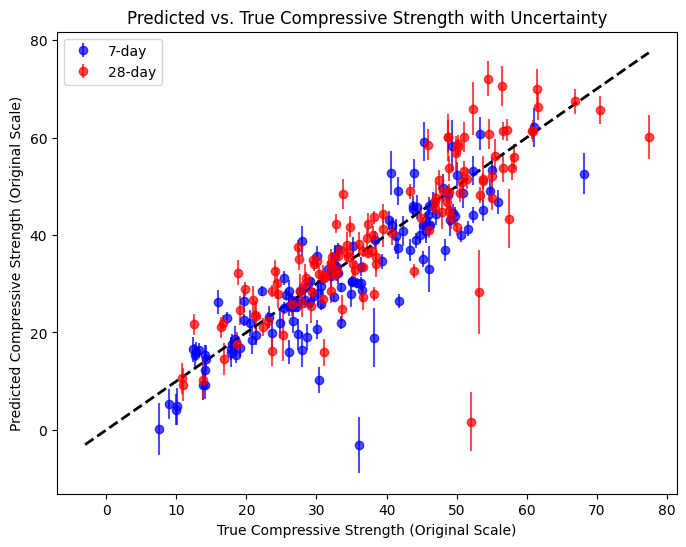

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 0. Data Preparation for Final Training and Testing
# -----------------------------------------------------------------------------
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# We use the previously defined split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# Use the same dataset class.
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
test_dataset = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Use full-batch loaders.
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Final Training dataset size:", len(train_dataset_full))
print("Final Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 1. Model Definition (Same as before)
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 2. GP Negative Log Likelihood Loss Function (Same as tuning)
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 3. Training Loop Function (No validation)
# -----------------------------------------------------------------------------
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# -----------------------------------------------------------------------------
# 4. MC Dropout Inference Function for Testing (Same as tuning)
# -----------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# -----------------------------------------------------------------------------
# 5. Final Training and Testing on the Held-out Test Set
# -----------------------------------------------------------------------------
# Best hyperparameters from tuning (example values).
best_dropout = 0.15
best_lr = 0.01
best_hidden_dims = [256, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the test set.
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from the scaled space to the original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test = next(iter(test_loader))
y_test_np = y_test.numpy()
y_true_original = target_scaler.inverse_transform(y_test_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("First 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [55]:
import numpy as np

# Compute absolute prediction errors
error_7 = np.abs(y_pred_original[:, 0] - y_true_original[:, 0])
error_28 = np.abs(y_pred_original[:, 1] - y_true_original[:, 1])

# Get the indices of the top 5 largest errors
top_5_errors_7 = np.argsort(error_7)[-30:]  # Largest errors for 7-day strength
top_5_errors_28 = np.argsort(error_28)[-30:]  # Largest errors for 28-day strength

# Print the details for the worst-predicted points
print("Top 5 Worst Predictions for 7-day Strength:")
for idx in top_5_errors_7:
    print(f"Index: {idx}, True: {y_true_original[idx, 0]:.2f}, Predicted: {y_pred_original[idx, 0]:.2f}, Error: {error_7[idx]:.2f}")

print("\nTop 5 Worst Predictions for 28-day Strength:")
for idx in top_5_errors_28:
    print(f"Index: {idx}, True: {y_true_original[idx, 1]:.2f}, Predicted: {y_pred_original[idx, 1]:.2f}, Error: {error_28[idx]:.2f}")


Top 5 Worst Predictions for 7-day Strength:
Index: 4, True: 34.92, Predicted: 27.90, Error: 7.01
Index: 75, True: 7.50, Predicted: 0.29, Error: 7.21
Index: 9, True: 41.61, Predicted: 49.01, Error: 7.40
Index: 19, True: 53.26, Predicted: 60.80, Error: 7.54
Index: 50, True: 27.30, Predicted: 19.61, Error: 7.69
Index: 22, True: 36.53, Predicted: 28.66, Error: 7.87
Index: 59, True: 52.26, Predicted: 44.10, Error: 8.16
Index: 122, True: 43.93, Predicted: 52.63, Error: 8.70
Index: 25, True: 53.76, Predicted: 45.03, Error: 8.73
Index: 79, True: 49.35, Predicted: 58.35, Error: 9.00
Index: 113, True: 55.90, Predicted: 46.68, Error: 9.22
Index: 77, True: 30.04, Predicted: 20.63, Error: 9.41
Index: 2, True: 28.60, Predicted: 19.10, Error: 9.50
Index: 66, True: 45.16, Predicted: 35.16, Error: 10.00
Index: 56, True: 26.02, Predicted: 16.02, Error: 10.00
Index: 10, True: 16.00, Predicted: 26.17, Error: 10.17
Index: 107, True: 51.62, Predicted: 41.32, Error: 10.30
Index: 39, True: 50.64, Predicted: 4

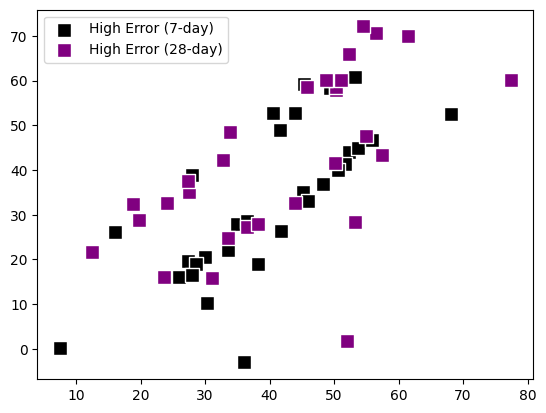

In [56]:
plt.scatter(y_true_original[top_5_errors_7, 0], y_pred_original[top_5_errors_7, 0], 
            color='black', marker='s', label='High Error (7-day)', edgecolors='white', s=100)
plt.scatter(y_true_original[top_5_errors_28, 1], y_pred_original[top_5_errors_28, 1], 
            color='purple', marker='s', label='High Error (28-day)', edgecolors='white', s=100)

plt.legend()
plt.show()


In [57]:
from scipy.stats import zscore

# Compute Z-scores for all features
z_scores = np.abs(zscore(X_test))  # X_test is your test feature set

# Check the Z-scores for the worst predicted points
print("\nFeature Outlier Check for Top 5 Worst 7-day Predictions:")
for idx in top_5_errors_7:
    print(f"Index: {idx}, Z-scores: {z_scores[idx]}")

print("\nFeature Outlier Check for Top 5 Worst 28-day Predictions:")
for idx in top_5_errors_28:
    print(f"Index: {idx}, Z-scores: {z_scores[idx]}")



Feature Outlier Check for Top 5 Worst 7-day Predictions:
Index: 4, Z-scores: [0.29165309 0.15204848 0.71481255 0.72090978 0.44034643 0.49181953
 0.16790914 0.92107536 0.59993618 0.14356577 0.17037537 0.2402152
 0.63824999 0.62194849 0.26272977 0.59561292 2.06350712 2.07504553
 0.75535    0.94309092 0.25477768 1.6222068 ]
Index: 75, Z-scores: [0.26635569 0.81407084 0.15767436 0.63299193 0.04787006 0.0840803
 3.60929689 1.80294575 1.79922832 0.47960968 0.17037537 0.2402152
 0.79541876 2.5139132  0.05372756 1.97609893 2.18913636 0.45109685
 0.75535    0.90371735 0.25477768 0.11584392]
Index: 9, Z-scores: [1.54082328 0.39876957 0.89191261 1.32387479 1.59079947 0.0071802
 0.53729491 1.37530316 0.67004077 0.47960968 0.17037537 0.2402152
 0.79541876 0.18044051 0.36427686 1.97609893 0.41720158 0.36087748
 0.20724683 0.94309092 0.25477768 0.11584392]
Index: 19, Z-scores: [0.96968921 1.32032495 1.01938286 1.77584058 0.19810875 0.54743388
 0.82487041 0.33209067 0.67004077 0.47960968 0.17037537 0

In [58]:
from scipy.stats import zscore

# Compute Z-scores for all features
z_scores = np.abs(zscore(X_test))  # X_test is your test feature set

# Check the Z-scores for the worst predicted points
print("\nFeature Outlier Check for Top 5 Worst 7-day Predictions:")
for idx in top_5_errors_7:
    print(f"Index: {idx}, Z-scores: {z_scores[idx]}")

print("\nFeature Outlier Check for Top 5 Worst 28-day Predictions:")
for idx in top_5_errors_28:
    print(f"Index: {idx}, Z-scores: {z_scores[idx]}")

# Additionally, print only the indices:
print("\nIndices of worst 7-day predictions:", top_5_errors_7)
print("Indices of worst 28-day predictions:", top_5_errors_28)



Feature Outlier Check for Top 5 Worst 7-day Predictions:
Index: 4, Z-scores: [0.29165309 0.15204848 0.71481255 0.72090978 0.44034643 0.49181953
 0.16790914 0.92107536 0.59993618 0.14356577 0.17037537 0.2402152
 0.63824999 0.62194849 0.26272977 0.59561292 2.06350712 2.07504553
 0.75535    0.94309092 0.25477768 1.6222068 ]
Index: 75, Z-scores: [0.26635569 0.81407084 0.15767436 0.63299193 0.04787006 0.0840803
 3.60929689 1.80294575 1.79922832 0.47960968 0.17037537 0.2402152
 0.79541876 2.5139132  0.05372756 1.97609893 2.18913636 0.45109685
 0.75535    0.90371735 0.25477768 0.11584392]
Index: 9, Z-scores: [1.54082328 0.39876957 0.89191261 1.32387479 1.59079947 0.0071802
 0.53729491 1.37530316 0.67004077 0.47960968 0.17037537 0.2402152
 0.79541876 0.18044051 0.36427686 1.97609893 0.41720158 0.36087748
 0.20724683 0.94309092 0.25477768 0.11584392]
Index: 19, Z-scores: [0.96968921 1.32032495 1.01938286 1.77584058 0.19810875 0.54743388
 0.82487041 0.33209067 0.67004077 0.47960968 0.17037537 0

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 10/500, Training NLL Loss: 2.2660
Epoch 20/500, Training NLL Loss: 1.7216
Epoch 30/500, Training NLL Loss: 1.3691
Epoch 40/500, Training NLL Loss: 1.2401
Epoch 50/500, Training NLL Loss: 1.0781
Epoch 60/500, Training NLL Loss: 0.9931
Epoch 70/500, Training NLL Loss: 0.8368
Epoch 80/500, Training NLL Loss: 0.7595
Epoch 90/500, Training NLL Loss: 0.7137
Epoch 100/500, Training NLL Loss: 0.7650
Epoch 110/500, Training NLL Loss: 0.7426
Epoch 120/500, Training NLL Loss: 0.7282
Epoch 130/500, Training NLL Loss: 0.6007
Epoch 140/500, Training NLL Loss: 0.5260
Epoch 150/500, Training NLL Loss: 0.4492
Epoch 160/500, Training NLL Loss: 0.5220
Epoch 170/500, Training NLL Loss: 0.4202
Epoch 180/500, Training NLL Loss: 0.4309
Epoch 190/500, Training NLL Loss: 0.3999
Epoch 200/500, Training NLL Loss: 0.3645
Epoch 210/500, Training NLL Loss: 0.3578
Epoch 220/500, Training NLL Loss: 0.4370
Epoch 230/500

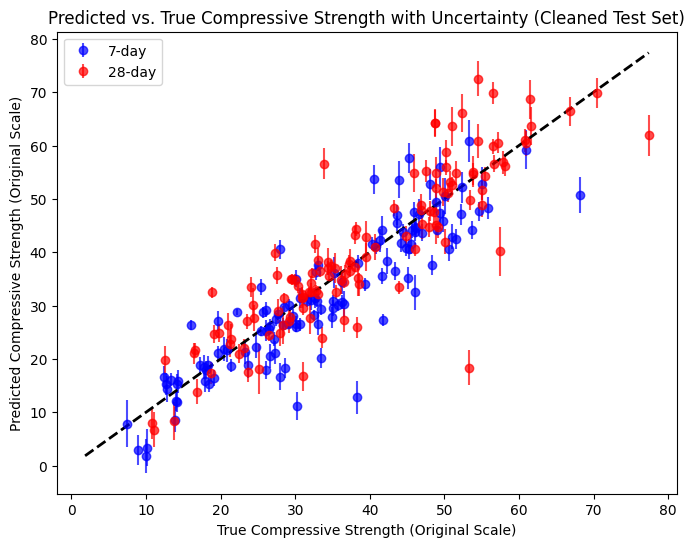

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class (same as before)
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing (Same as before)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Final Training and Testing on the Held-out (Cleaned) Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.15
best_lr = 0.01
best_hidden_dims = [256, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength (cleaned):", r2_7_final)
print("Final Test R² for 28-day compressive strength (cleaned):", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars (Cleaned Test Set)
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty (Cleaned Test Set)")
plt.legend()
plt.show()


In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold  # for CV
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are already defined.
# =============================================================================

# Fit the target scaler on the original targets.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# =============================================================================
# Dataset Definition
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# =============================================================================
# 1. Model Definition: AGPModelGP_v2 (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Evaluation (Same as before)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Cross Validation
# =============================================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_fold_r2 = []
fold = 0
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

for train_index, val_index in kf.split(X_scaled):
    fold += 1
    print(f"\n--- Fold {fold} ---")
    # Prepare fold datasets
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y7_train_cv, y7_val_cv = y_7_scaled[train_index], y_7_scaled[val_index]
    y28_train_cv, y28_val_cv = y_28_scaled[train_index], y_28_scaled[val_index]
    
    train_dataset_cv = ConcreteDatasetScaled(X_train_cv, y7_train_cv, y28_train_cv)
    val_dataset_cv   = ConcreteDatasetScaled(X_val_cv, y7_val_cv, y28_val_cv)
    
    train_loader_cv = DataLoader(train_dataset_cv, batch_size=len(train_dataset_cv))
    val_loader_cv   = DataLoader(val_dataset_cv, batch_size=len(val_dataset_cv))
    
    # Initialize model for this fold
    model_cv = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
    optimizer_cv = optim.Adam(model_cv.parameters(), lr=best_lr)
    
    # Train model for a fixed number of epochs (or use early stopping if desired)
    model_cv = train_gp_model(model_cv, train_loader_cv, t_fixed, optimizer_cv, num_epochs=300)
    
    # Inference using MC Dropout
    mc_mean_cv, _ = mc_predict_with_uncertainty(model_cv, val_loader_cv, t_fixed, num_samples=50)
    y_pred_cv = target_scaler.inverse_transform(mc_mean_cv)
    
    # Get true targets from the validation loader
    _, _, y_val_cv = next(iter(val_loader_cv))
    y_val_cv_np = y_val_cv.numpy()
    y_true_cv = target_scaler.inverse_transform(y_val_cv_np)
    
    r2_7_cv = r2_score(y_true_cv[:, 0], y_pred_cv[:, 0])
    r2_28_cv = r2_score(y_true_cv[:, 1], y_pred_cv[:, 1])
    avg_r2_cv = (r2_7_cv + r2_28_cv) / 2
    print(f"Fold {fold} Validation R²: 7-day: {r2_7_cv:.4f}, 28-day: {r2_28_cv:.4f}, Avg: {avg_r2_cv:.4f}")
    all_fold_r2.append(avg_r2_cv)

print("\nMean CV R² (average over folds):", np.mean(all_fold_r2))


Using device: cuda

--- Fold 1 ---
Epoch 10/300, Training NLL Loss: 3.9875
Epoch 20/300, Training NLL Loss: 2.7820
Epoch 30/300, Training NLL Loss: 1.8840
Epoch 40/300, Training NLL Loss: 1.4834
Epoch 50/300, Training NLL Loss: 1.3208
Epoch 60/300, Training NLL Loss: 1.0686
Epoch 70/300, Training NLL Loss: 0.8911
Epoch 80/300, Training NLL Loss: 0.7231
Epoch 90/300, Training NLL Loss: 0.6579
Epoch 100/300, Training NLL Loss: 0.5764
Epoch 110/300, Training NLL Loss: 0.5027
Epoch 120/300, Training NLL Loss: 0.4001
Epoch 130/300, Training NLL Loss: 0.4270
Epoch 140/300, Training NLL Loss: 0.3594
Epoch 150/300, Training NLL Loss: 0.3115
Epoch 160/300, Training NLL Loss: 0.3021
Epoch 170/300, Training NLL Loss: 0.3037
Epoch 180/300, Training NLL Loss: 0.2925
Epoch 190/300, Training NLL Loss: 0.1436
Epoch 200/300, Training NLL Loss: 0.2187
Epoch 210/300, Training NLL Loss: 0.0861
Epoch 220/300, Training NLL Loss: 0.1283
Epoch 230/300, Training NLL Loss: 0.1869
Epoch 240/300, Training NLL Los

In [62]:
# =============================================================================
# 4. Cross Validation with Outlier Identification in Fold 2
# =============================================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_fold_r2 = []
fold = 0
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# We'll store worst error info for fold 2:
fold2_worst_original_index = None
fold2_worst_error = None

for train_index, val_index in kf.split(X_scaled):
    fold += 1
    print(f"\n--- Fold {fold} ---")
    # Prepare fold datasets
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y7_train_cv, y7_val_cv = y_7_scaled[train_index], y_7_scaled[val_index]
    y28_train_cv, y28_val_cv = y_28_scaled[train_index], y_28_scaled[val_index]
    
    train_dataset_cv = ConcreteDatasetScaled(X_train_cv, y7_train_cv, y28_train_cv)
    val_dataset_cv   = ConcreteDatasetScaled(X_val_cv, y7_val_cv, y28_val_cv)
    
    train_loader_cv = DataLoader(train_dataset_cv, batch_size=len(train_dataset_cv))
    val_loader_cv   = DataLoader(val_dataset_cv, batch_size=len(val_dataset_cv))
    
    # Initialize model for this fold
    model_cv = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
    optimizer_cv = optim.Adam(model_cv.parameters(), lr=best_lr)
    
    # Train model for a fixed number of epochs (or use early stopping if desired)
    model_cv = train_gp_model(model_cv, train_loader_cv, t_fixed, optimizer_cv, num_epochs=300)
    
    # Inference using MC Dropout
    mc_mean_cv, _ = mc_predict_with_uncertainty(model_cv, val_loader_cv, t_fixed, num_samples=50)
    y_pred_cv = target_scaler.inverse_transform(mc_mean_cv)
    
    # Get true targets from the validation loader
    _, _, y_val_cv = next(iter(val_loader_cv))
    y_val_cv_np = y_val_cv.numpy()
    y_true_cv = target_scaler.inverse_transform(y_val_cv_np)
    
    # Compute R² scores for this fold:
    r2_7_cv = r2_score(y_true_cv[:, 0], y_pred_cv[:, 0])
    r2_28_cv = r2_score(y_true_cv[:, 1], y_pred_cv[:, 1])
    avg_r2_cv = (r2_7_cv + r2_28_cv) / 2
    print(f"Fold {fold} Validation R²: 7-day: {r2_7_cv:.4f}, 28-day: {r2_28_cv:.4f}, Avg: {avg_r2_cv:.4f}")
    all_fold_r2.append(avg_r2_cv)
    
    # --- For Fold 2: Identify the worst predicted point ---
    if fold == 2:
        # Compute absolute errors for both targets.
        errors_7 = np.abs(y_pred_cv[:, 0] - y_true_cv[:, 0])
        errors_28 = np.abs(y_pred_cv[:, 1] - y_true_cv[:, 1])
        # Average the two errors (you can adjust the metric if desired)
        avg_errors = (errors_7 + errors_28) / 2.0
        
        # Identify the index (within the fold) of the worst prediction.
        worst_idx_in_fold = np.argmax(avg_errors)
        worst_error_val = avg_errors[worst_idx_in_fold]
        
        # Map this index back to the original dataset.
        fold2_worst_original_index = val_index[worst_idx_in_fold]
        fold2_worst_error = worst_error_val
        print(f"Fold 2: Worst predicted point is at index {fold2_worst_original_index} (original dataset) with average error {worst_error_val:.2f}")

print("\nMean CV R² (average over folds):", np.mean(all_fold_r2))



--- Fold 1 ---
Epoch 10/300, Training NLL Loss: 2.8680
Epoch 20/300, Training NLL Loss: 1.7713
Epoch 30/300, Training NLL Loss: 1.2925
Epoch 40/300, Training NLL Loss: 0.9625
Epoch 50/300, Training NLL Loss: 0.7707
Epoch 60/300, Training NLL Loss: 0.6678
Epoch 70/300, Training NLL Loss: 0.5353
Epoch 80/300, Training NLL Loss: 0.5006
Epoch 90/300, Training NLL Loss: 0.4648
Epoch 100/300, Training NLL Loss: 0.4218
Epoch 110/300, Training NLL Loss: 0.3706
Epoch 120/300, Training NLL Loss: 0.4085
Epoch 130/300, Training NLL Loss: 0.3471
Epoch 140/300, Training NLL Loss: 0.2802
Epoch 150/300, Training NLL Loss: 0.2288
Epoch 160/300, Training NLL Loss: 0.2961
Epoch 170/300, Training NLL Loss: 0.1880
Epoch 180/300, Training NLL Loss: 0.1892
Epoch 190/300, Training NLL Loss: 0.1476
Epoch 200/300, Training NLL Loss: 0.1309
Epoch 210/300, Training NLL Loss: 0.1081
Epoch 220/300, Training NLL Loss: 0.0433
Epoch 230/300, Training NLL Loss: 0.1338
Epoch 240/300, Training NLL Loss: 0.0105
Epoch 250

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold  # for CV
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are already defined.
# =============================================================================

# Fit the target scaler on the original targets.
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# =============================================================================
# Dataset Definition
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# =============================================================================
# 1. Model Definition: AGPModelGP_v2 (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Evaluation (Same as before)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Cross Validation with Worst-Case Identification
# =============================================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_fold_r2 = []
fold = 0
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

for train_index, val_index in kf.split(X_scaled):
    fold += 1
    print(f"\n--- Fold {fold} ---")
    # Prepare fold datasets
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y7_train_cv, y7_val_cv = y_7_scaled[train_index], y_7_scaled[val_index]
    y28_train_cv, y28_val_cv = y_28_scaled[train_index], y_28_scaled[val_index]
    
    train_dataset_cv = ConcreteDatasetScaled(X_train_cv, y7_train_cv, y28_train_cv)
    val_dataset_cv   = ConcreteDatasetScaled(X_val_cv, y7_val_cv, y28_val_cv)
    
    train_loader_cv = DataLoader(train_dataset_cv, batch_size=len(train_dataset_cv))
    val_loader_cv   = DataLoader(val_dataset_cv, batch_size=len(val_dataset_cv))
    
    # Initialize model for this fold using fixed hyperparameters.
    # (Parameters used: dropout_rate=0.15, learning rate=0.01, hidden_dims=[256, 128, 64])
    model_cv = model_class(input_dim, hidden_dims=[256, 128, 64], dropout_rate=0.15).to(device)
    optimizer_cv = optim.Adam(model_cv.parameters(), lr=0.01)
    
    # Train model for a fixed number of epochs
    model_cv = train_gp_model(model_cv, train_loader_cv, t_fixed, optimizer_cv, num_epochs=300)
    
    # Inference using MC Dropout
    mc_mean_cv, _ = mc_predict_with_uncertainty(model_cv, val_loader_cv, t_fixed, num_samples=50)
    y_pred_cv = target_scaler.inverse_transform(mc_mean_cv)
    
    # Get true targets from the validation loader
    _, _, y_val_cv = next(iter(val_loader_cv))
    y_val_cv_np = y_val_cv.numpy()
    y_true_cv = target_scaler.inverse_transform(y_val_cv_np)
    
    r2_7_cv = r2_score(y_true_cv[:, 0], y_pred_cv[:, 0])
    r2_28_cv = r2_score(y_true_cv[:, 1], y_pred_cv[:, 1])
    avg_r2_cv = (r2_7_cv + r2_28_cv) / 2
    print(f"Fold {fold} Validation R²: 7-day: {r2_7_cv:.4f}, 28-day: {r2_28_cv:.4f}, Avg: {avg_r2_cv:.4f}")
    all_fold_r2.append(avg_r2_cv)
    
    # Identify the indices of the 5 worst predictions in this fold.
    errors_7 = np.abs(y_pred_cv[:, 0] - y_true_cv[:, 0])
    errors_28 = np.abs(y_pred_cv[:, 1] - y_true_cv[:, 1])
    avg_errors = (errors_7 + errors_28) / 2.0
    
    worst_indices_in_fold = np.argsort(avg_errors)[-5:]  # indices within the fold
    worst_original_indices = val_index[worst_indices_in_fold]
    print(f"Fold {fold}: Worst 5 prediction indices (original): {worst_original_indices}")

print("\nMean CV R² (average over folds):", np.mean(all_fold_r2))
print("\nHyperparameters used:")
print("Dropout rate:", 0.15)
print("Learning rate:", 0.01)
print("Hidden dimensions:", [256, 128, 64])


Using device: cuda

--- Fold 1 ---
Epoch 10/300, Training NLL Loss: 3.0837
Epoch 20/300, Training NLL Loss: 1.9970
Epoch 30/300, Training NLL Loss: 1.5121
Epoch 40/300, Training NLL Loss: 1.2226
Epoch 50/300, Training NLL Loss: 0.9755
Epoch 60/300, Training NLL Loss: 0.7891
Epoch 70/300, Training NLL Loss: 0.6807
Epoch 80/300, Training NLL Loss: 0.5440
Epoch 90/300, Training NLL Loss: 0.5144
Epoch 100/300, Training NLL Loss: 0.4326
Epoch 110/300, Training NLL Loss: 0.4441
Epoch 120/300, Training NLL Loss: 0.3107
Epoch 130/300, Training NLL Loss: 0.3482
Epoch 140/300, Training NLL Loss: 0.3391
Epoch 150/300, Training NLL Loss: 0.2746
Epoch 160/300, Training NLL Loss: 0.2459
Epoch 170/300, Training NLL Loss: 0.1631
Epoch 180/300, Training NLL Loss: 0.1885
Epoch 190/300, Training NLL Loss: 0.0926
Epoch 200/300, Training NLL Loss: 0.0989
Epoch 210/300, Training NLL Loss: 0.1117
Epoch 220/300, Training NLL Loss: 0.0904
Epoch 230/300, Training NLL Loss: 0.0544
Epoch 240/300, Training NLL Los

In [65]:
from scipy.stats import zscore
import numpy as np

# The indices you provided:
indices = [72, 135, 268, 625, 101, 0, 604, 117, 374, 305, 527, 465, 603, 3, 124, 123, 307, 618, 323, 35, 459, 510, 216, 160, 623]

# Compute the z-scores for all features in X_scaled.
# The zscore function computes the z-score along each column (feature) by default.
z_scores = zscore(X_scaled)

print("Z-scores for the specified indices:")
for idx in indices:
    print(f"Index {idx}: {z_scores[idx]}")


Z-scores for the specified indices:
Index 72: [ 0.34511426  0.85716992  2.03911891 -1.0628371  -0.71859741 -0.21220197
 -0.21076173 -0.44312302 -0.51777663  1.83078816 -0.21532038 -0.26709786
  0.6515886  -1.20440418 -0.34249763 -0.43939288 -0.31996592 -0.98827209
  0.201232    0.88418371 -0.22756259  0.1805757 ]
Index 135: [ 0.12612602  0.89955071  1.67583864 -0.79542134 -0.8321108  -0.38335127
 -0.52527051  0.10440942  2.1414884   1.56672569 -0.21532038 -0.26709786
 -0.37220691 -0.75077462 -0.34255822  1.096045    0.26635906 -0.98827209
 -0.63878803 -0.87635907 -0.22756259  0.80710501]
Index 268: [ 1.49154784  1.08468783 -0.68024016 -1.17781671 -0.89627054 -0.15019136
  0.01319189 -0.45716231 -0.71608126 -0.44561239 -0.21532038 -0.26709786
  0.92189764 -0.75077462 -0.34255822  0.87669673 -0.08543593 -0.21000782
  0.89614544  0.10172025 -0.22756259  0.1805757 ]
Index 625: [-0.99174387 -1.49087442 -1.07171601  1.84410137 -0.16912679 -0.54705929
 -0.79498857 -0.2746515  -0.71608126 -0.4

#Need to do cv, split 80

#below is just trial of different parameters with vali R2 > 0.8

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.0096
Epoch 100/500, Training NLL Loss: 0.2076
Epoch 150/500, Training NLL Loss: -0.0748
Epoch 200/500, Training NLL Loss: -0.1879
Epoch 250/500, Training NLL Loss: -0.3910
Epoch 300/500, Training NLL Loss: -0.4462
Epoch 350/500, Training NLL Loss: -0.5684
Epoch 400/500, Training NLL Loss: -0.6201
Epoch 450/500, Training NLL Loss: -0.6041
Epoch 500/500, Training NLL Loss: -0.7053

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength (cleaned): 0.7440626621246338
Final Test R² for 28-day compressive strength (cleaned): 0.7530466914176941

First 10 predicted means for 7-day: [27.470924 36.28422  19.99812  42.44088  30.16471  28.508858 57.18651
 42.701614 48.034325 47.732975]
First 10 predicted std dev for 7-day: [0.90121301 0.93942563 1.48755378 1.2491817  1.33618728 0.86207583
 1.38510037 0.91701226 1.08891681 0.8039681

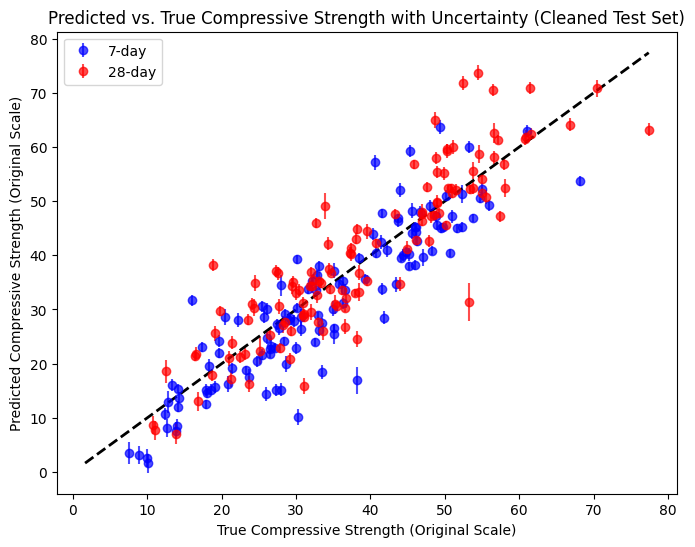

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out (Cleaned) Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.0005
best_hidden_dims = [256, 256, 128]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength (cleaned):", r2_7_final)
print("Final Test R² for 28-day compressive strength (cleaned):", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars (Cleaned Test Set)
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty (Cleaned Test Set)")
plt.legend()
plt.show()


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out (Cleaned) Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.005
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength (cleaned):", r2_7_final)
print("Final Test R² for 28-day compressive strength (cleaned):", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars (Cleaned Test Set)
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty (Cleaned Test Set)")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.7051
Epoch 100/500, Training NLL Loss: -0.0178
Epoch 150/500, Training NLL Loss: -0.3609
Epoch 200/500, Training NLL Loss: -0.5483
Epoch 250/500, Training NLL Loss: -0.6344
Epoch 300/500, Training NLL Loss: -0.7471
Epoch 350/500, Training NLL Loss: -0.7934
Epoch 400/500, Training NLL Loss: -0.9017
Epoch 450/500, Training NLL Loss: -1.0081
Epoch 500/500, Training NLL Loss: -1.0148

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength (cleaned): 0.7405418157577515
Final Test R² for 28-day compressive strength (cleaned): 0.7572646737098694

First 10 predicted means for 7-day: [27.444183 37.28555  18.92617  34.2128   30.187202 28.670961 51.213943
 42.135212 46.086067 46.626427]
First 10 predicted std dev for 7-day: [0.40429751 0.59261081 1.62187098 1.60542737 1.20469886 0.76921703
 1.25291739 0.83777332 1.44608556 1.33530

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.01
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.6266
Epoch 100/500, Training NLL Loss: 0.0952
Epoch 150/500, Training NLL Loss: -0.1391
Epoch 200/500, Training NLL Loss: -0.2688
Epoch 250/500, Training NLL Loss: -0.3755
Epoch 300/500, Training NLL Loss: -0.5172
Epoch 350/500, Training NLL Loss: -0.5250
Epoch 400/500, Training NLL Loss: -0.6436
Epoch 450/500, Training NLL Loss: -0.7575
Epoch 500/500, Training NLL Loss: -0.8730

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7615247368812561
Final Test R² for 28-day compressive strength: 0.781535267829895

First 10 predicted means for 7-day: [26.965082 36.23318  22.639698 33.84214  31.98267  29.881327 54.391655
 40.289135 45.921326 45.056347]
First 10 predicted std dev for 7-day: [0.68385081 0.66798965 1.07257976 1.96624372 0.82674814 0.60288502
 2.65308267 0.62635004 1.54567209 1.36051124]
First 10 predicte

In [19]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 10 indices.
worst_10_indices = sorted_indices[:10]

print("Worst 10 Points with Original Features (z):")
for idx in worst_10_indices:
    # Retrieve the features 'z' for this sample from the test dataset.
    # Note: In our ConcreteDatasetScaled, the features are stored in the 'z' attribute.
    features = test_dataset_clean.z[idx].numpy()  # or test_dataset_clean[idx][0].numpy()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}, Features (z): {features}")


Worst 10 Points with Original Features (z):
Index: 114, Combined Error: 28.1820, z-score: 3.8135, Features (z): [-0.16522379  0.6172182  -0.6013305   0.01496643  0.5496679  -0.54151344
 -0.26096827 -1.0187341   1.6712574   0.11933236 -0.21532038 -0.26709786
 -0.21302779 -1.842331    0.28019527 -0.4393929  -2.7825308  -0.21000782
 -0.63878804 -0.87635905 -0.22756259 -1.072483  ]
Index: 79, Combined Error: 24.5683, z-score: 3.1590, Features (z): [-0.99174386 -1.4908744  -1.0717161   1.8441014  -0.1691268  -0.5470593
 -0.7949886  -0.2746515  -0.71608126 -0.4456124  -0.21532038 -0.26709786
 -0.36207032  0.15665546 -0.3926755   0.65734845 -0.08543593 -0.21000782
  1.1154217   1.6666472  -0.22756259 -0.4459536 ]
Index: 55, Combined Error: 24.5222, z-score: 3.1506, Features (z): [ 1.3943925   1.2780037  -0.4076052  -1.1277336  -0.9785266   0.13505746
  0.20793417 -1.0145223  -0.6962508  -0.4456124  -0.21532038 -0.26709786
 -0.46343622  2.1965582   0.48437673 -0.22004461  1.3217441  -0.2100078

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.05
best_lr = 0.001
best_hidden_dims = [256, 256, 128]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.9778
Epoch 100/500, Training NLL Loss: 0.2668
Epoch 150/500, Training NLL Loss: -0.0464
Epoch 200/500, Training NLL Loss: -0.2259
Epoch 250/500, Training NLL Loss: -0.3012
Epoch 300/500, Training NLL Loss: -0.4878
Epoch 350/500, Training NLL Loss: -0.5355
Epoch 400/500, Training NLL Loss: -0.5734
Epoch 450/500, Training NLL Loss: -0.6631
Epoch 500/500, Training NLL Loss: -0.6959

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7691366672515869
Final Test R² for 28-day compressive strength: 0.7805583477020264

First 10 predicted means for 7-day: [28.368494 36.580757 18.271866 44.065197 28.49346  28.104538 56.358364
 44.901768 47.87859  48.152985]
First 10 predicted std dev for 7-day: [1.07578675 1.22852215 1.85990934 2.03154373 1.91680065 0.93085255
 2.19100185 1.29457497 1.49698408 1.48233995]
First 10 predict

In [24]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 10 indices.
worst_10_indices = sorted_indices[:20]

print("Worst 10 Points with Original Features (z):")
for idx in worst_10_indices:
    # Retrieve the features 'z' for this sample from the test dataset.
    # Note: In our ConcreteDatasetScaled, the features are stored in the 'z' attribute.
    features = test_dataset_clean.z[idx].numpy()  # or test_dataset_clean[idx][0].numpy()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}, Features (z): {features}")


Worst 10 Points with Original Features (z):
Index: 6, Combined Error: 21.8709, z-score: 2.8416, Features (z): [-0.99174386 -1.4908744  -1.0717161   1.8441014  -0.1691268  -0.5470593
 -0.7949886  -0.2746515  -0.71608126 -0.4456124  -0.21532038 -0.26709786
 -0.36207032  0.6103705  -0.3425968   0.65734845 -0.20270093  0.56825644
  1.1154217   1.6666472  -0.22756259 -0.4459536 ]
Index: 37, Combined Error: 20.5173, z-score: 2.5766, Features (z): [-0.99174386 -1.4908744  -1.0717161   1.8441014  -0.1691268  -0.5470593
 -0.7949886  -0.2746515  -0.71608126 -0.4456124  -0.21532038 -0.26709786
 -0.36207032  0.6103705  -0.3425968   0.65734845 -0.20270093  0.56825644
  1.1154217  -0.6807432  -0.22756259  0.1805757 ]
Index: 10, Combined Error: 20.4601, z-score: 2.5654, Features (z): [ 1.4915478   1.0846878  -0.68024015 -1.1778167  -0.8962705  -0.15019137
  0.01319189 -0.45716232 -0.71608126 -0.4456124  -0.21532038 -0.26709786
  0.92189765 -0.7507746  -0.3425582   0.8766967  -0.08543593 -0.21000782
 

In [23]:
#用上面这个index 找奇怪的点

In [28]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 6, Combined Error: 21.8709, z-score: 2.8416
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  5.0000000e-01  3.9997202e-01  2.5000000e+00
  4.3000002e+00  4.0000001e-01  2.9999999e-02  9.0000000e+01
  2.4000000e+01  1.0000000e+01]

Index: 37, Combined Error: 20.5173, z-score: 2.5766
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  5.0000000e-01  3.9997202e-01  2.5000000e+00
  4.3000002e+00  4.0000001e-01  2.9999999e-02  3.0000000e+01
  2.4000000e+01  1.2000000e+01]

Index: 10, Combined Error: 20.4601, z-score: 2.5654
Original Features: [ 6.2299999e+01  2.8100000e+01  2.0999999e+00  4.9999902e-01
  1.000000

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.05
best_lr = 0.002
best_hidden_dims = [128, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.0936
Epoch 100/500, Training NLL Loss: 0.3390
Epoch 150/500, Training NLL Loss: 0.0314
Epoch 200/500, Training NLL Loss: -0.0912
Epoch 250/500, Training NLL Loss: -0.2490
Epoch 300/500, Training NLL Loss: -0.2476
Epoch 350/500, Training NLL Loss: -0.3763
Epoch 400/500, Training NLL Loss: -0.4344
Epoch 450/500, Training NLL Loss: -0.5603
Epoch 500/500, Training NLL Loss: -0.5427

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7935452461242676
Final Test R² for 28-day compressive strength: 0.8059626817703247

First 10 predicted means for 7-day: [28.13567  34.7823   18.37111  44.360596 28.521116 28.807058 53.857407
 43.563488 45.924797 46.498642]
First 10 predicted std dev for 7-day: [1.07091205 1.74255746 2.41034532 2.7293635  2.5120857  1.53995994
 2.62298812 1.34708238 1.64309931 2.3663289 ]
First 10 predicte

In [30]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 84, Combined Error: 24.4419, z-score: 3.5321
Original Features: [ 3.7500000e+01  6.3999996e+00  5.1000005e-01  3.4799999e+01
  8.5999994e+00  3.8000000e-01  8.9999998e-01 -6.5108978e-08
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
 -4.5614623e-08  3.9990667e-01  1.0000000e+00  2.5999999e+00
  4.1999998e+00  5.0000000e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  4.0000000e+00]

Index: 28, Combined Error: 22.3271, z-score: 3.1084
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  4.4999999e-01  4.0001556e-01  2.5000000e+00
  4.4000001e+00  3.0000001e-01  2.9999999e-02  6.0000000e+01
  2.4000000e+01  1.4000000e+01]

Index: 114, Combined Error: 21.1447, z-score: 2.8715
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.8954
Epoch 100/500, Training NLL Loss: 0.1590
Epoch 150/500, Training NLL Loss: -0.1410
Epoch 200/500, Training NLL Loss: -0.3241
Epoch 250/500, Training NLL Loss: -0.5063
Epoch 300/500, Training NLL Loss: -0.6378
Epoch 350/500, Training NLL Loss: -0.7708
Epoch 400/500, Training NLL Loss: -0.8483
Epoch 450/500, Training NLL Loss: -0.9055
Epoch 500/500, Training NLL Loss: -1.0042

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7428215742111206
Final Test R² for 28-day compressive strength: 0.7788175940513611

First 10 predicted means for 7-day: [26.184383 34.529434 19.404804 44.024998 28.550282 28.368414 56.21234
 43.247234 46.606216 46.201984]
First 10 predicted std dev for 7-day: [0.7555675  1.0869994  1.14635975 1.29112511 1.06685062 0.76244032
 1.08242014 0.77982728 0.98044428 0.89408952]
First 10 predicte

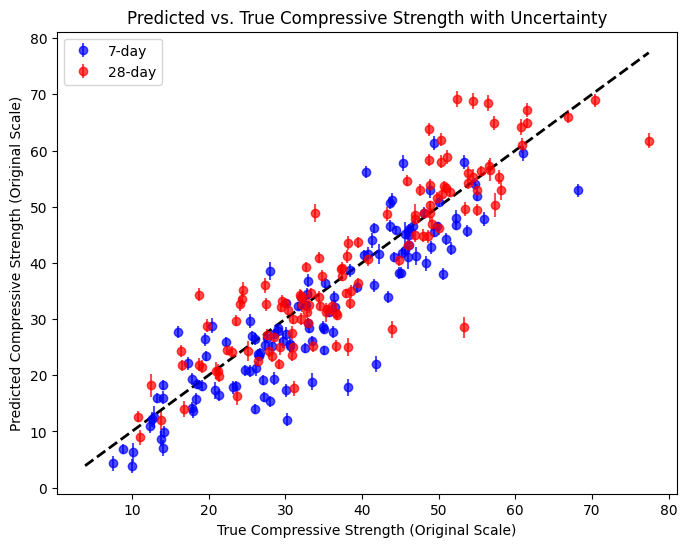

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.0005
best_hidden_dims = [256, 256, 128]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [32]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 32.0677, z-score: 4.4475
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 111, Combined Error: 25.3003, z-score: 3.2296
Original Features: [ 5.0500000e+01  2.6570000e+01  1.3770000e+01  2.1300001e+00
  1.5400000e+00  4.4999999e-01  7.7000004e-01  4.1000000e-01
  1.0000001e-01  1.0000000e+00 -2.3345357e-11 -1.0689453e-09
  2.1000001e+00  3.0000940e-01  4.0004396e-01  2.0000000e+00
  4.1999998e+00  2.0000000e-01  1.4365786e-02  7.0000000e+01
  2.4000000e+01  1.2000000e+01]

Index: 55, Combined Error: 22.5957, z-score: 2.7429
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.500

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.9698
Epoch 100/500, Training NLL Loss: 0.3396
Epoch 150/500, Training NLL Loss: -0.0435
Epoch 200/500, Training NLL Loss: -0.2182
Epoch 250/500, Training NLL Loss: -0.4813
Epoch 300/500, Training NLL Loss: -0.3952
Epoch 350/500, Training NLL Loss: -0.5968
Epoch 400/500, Training NLL Loss: -0.5894
Epoch 450/500, Training NLL Loss: -0.7586
Epoch 500/500, Training NLL Loss: -0.7669

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7560316324234009
Final Test R² for 28-day compressive strength: 0.7669152021408081

First 10 predicted means for 7-day: [27.89171  33.507584 19.62775  39.377197 29.84863  28.683926 52.769207
 43.36     48.09272  44.45076 ]
First 10 predicted std dev for 7-day: [0.65885901 1.03400404 1.35040277 1.09581074 1.08334407 0.63609494
 1.18762621 0.79067553 1.37264377 1.53308324]
First 10 predict

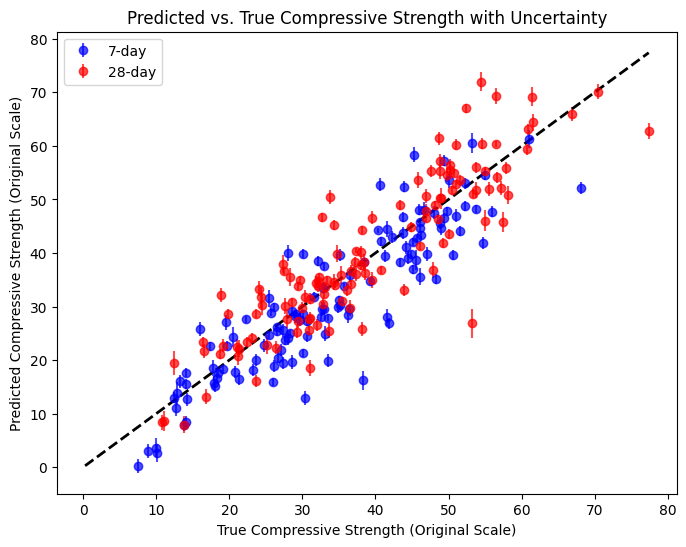

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.005
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [34]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 34.3889, z-score: 4.9238
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 28, Combined Error: 21.7464, z-score: 2.6163
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  4.4999999e-01  4.0001556e-01  2.5000000e+00
  4.4000001e+00  3.0000001e-01  2.9999999e-02  6.0000000e+01
  2.4000000e+01  1.4000000e+01]

Index: 55, Combined Error: 21.4897, z-score: 2.5694
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.5000

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.01
best_lr = 0.01
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.5839
Epoch 100/500, Training NLL Loss: -0.1237
Epoch 150/500, Training NLL Loss: -0.4229
Epoch 200/500, Training NLL Loss: -0.6420
Epoch 250/500, Training NLL Loss: -0.7963
Epoch 300/500, Training NLL Loss: -0.8364
Epoch 350/500, Training NLL Loss: -0.9262
Epoch 400/500, Training NLL Loss: -1.0901
Epoch 450/500, Training NLL Loss: -1.0140
Epoch 500/500, Training NLL Loss: -1.0382

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7452395558357239
Final Test R² for 28-day compressive strength: 0.7480990886688232

First 10 predicted means for 7-day: [27.263502 34.047432 19.044659 39.959057 28.699718 28.019493 52.194206
 40.834072 47.245564 47.702988]
First 10 predicted std dev for 7-day: [0.59192491 0.98809345 1.14682488 0.68538933 1.42305358 0.63221516
 2.69601902 0.69986151 1.59245869 1.22383158]
First 10 predic

In [38]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 54.4447, z-score: 7.3554
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 37, Combined Error: 23.6211, z-score: 2.5792
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  5.0000000e-01  3.9997202e-01  2.5000000e+00
  4.3000002e+00  4.0000001e-01  2.9999999e-02  3.0000000e+01
  2.4000000e+01  1.2000000e+01]

Index: 55, Combined Error: 21.9164, z-score: 2.3150
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.5000

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.7400
Epoch 100/500, Training NLL Loss: 0.3624
Epoch 150/500, Training NLL Loss: -0.2203
Epoch 200/500, Training NLL Loss: -0.5900
Epoch 250/500, Training NLL Loss: -0.7146
Epoch 300/500, Training NLL Loss: -0.9089
Epoch 350/500, Training NLL Loss: -0.9553
Epoch 400/500, Training NLL Loss: -1.0094
Epoch 450/500, Training NLL Loss: -1.0583
Epoch 500/500, Training NLL Loss: -1.2508

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7480020523071289
Final Test R² for 28-day compressive strength: 0.7657790184020996

First 10 predicted means for 7-day: [27.237768 36.53368  17.763851 35.993652 28.656662 29.076668 54.39535
 41.11554  46.995922 43.982704]
First 10 predicted std dev for 7-day: [0.87531857 0.81900286 0.99230158 0.98342092 0.80764399 0.68429714
 0.74800855 0.7748054  0.49481726 0.78238034]
First 10 predicte

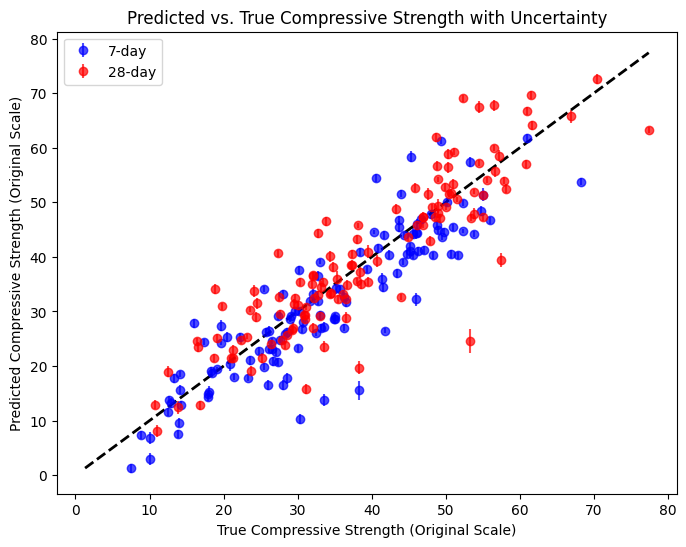

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.005
best_lr = 0.001
best_hidden_dims = [512, 256, 128]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [40]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 36.5999, z-score: 5.0800
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 81, Combined Error: 27.0749, z-score: 3.4287
Original Features: [ 5.1700001e+01  2.9100000e+01  4.7599998e+00  8.8400002e+00
  1.8027229e-07  1.4703764e-08  1.6000000e+00  1.5000000e+00
  7.0200002e-01  1.7000000e+00  1.0900000e-01 -1.0689453e-09
 -4.5614623e-08  4.1142857e-01  3.9805824e-01  2.0000000e+00
  5.3000002e+00  3.0000001e-01  2.4462038e-10  5.5000000e+01
  5.5000000e+01  8.0000000e+00]

Index: 55, Combined Error: 25.2162, z-score: 3.1064
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.5000

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.005
best_lr = 0.005
best_hidden_dims = [128, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.6074
Epoch 100/500, Training NLL Loss: -0.0750
Epoch 150/500, Training NLL Loss: -0.3219
Epoch 200/500, Training NLL Loss: -0.5324
Epoch 250/500, Training NLL Loss: -0.5418
Epoch 300/500, Training NLL Loss: -0.7256
Epoch 350/500, Training NLL Loss: -0.8199
Epoch 400/500, Training NLL Loss: -0.8549
Epoch 450/500, Training NLL Loss: -0.8888
Epoch 500/500, Training NLL Loss: -1.0312

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.716762363910675
Final Test R² for 28-day compressive strength: 0.7063156366348267

First 10 predicted means for 7-day: [28.159365 36.359375 17.498777 45.600597 28.819025 29.293495 55.94136
 41.21516  48.467796 44.23492 ]
First 10 predicted std dev for 7-day: [0.58127906 0.656319   2.24241188 0.63505911 0.92504764 0.66580561
 0.93929296 0.70368161 0.8377316  0.86270861]
First 10 predicte

In [42]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 54.4792, z-score: 7.0305
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 28, Combined Error: 25.4115, z-score: 2.6660
Original Features: [ 3.6740002e+01  1.0780001e+01  4.1999990e-01  4.3340000e+01
  3.2100000e+00  1.7999999e-01  1.6999999e-01  5.3000003e-01
 -1.5364874e-08  1.1475078e-09 -2.3345357e-11 -1.0689453e-09
  5.9999996e-01  4.4999999e-01  4.0001556e-01  2.5000000e+00
  4.4000001e+00  3.0000001e-01  2.9999999e-02  6.0000000e+01
  2.4000000e+01  1.4000000e+01]

Index: 55, Combined Error: 24.9233, z-score: 2.5927
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.5000

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.4789
Epoch 100/500, Training NLL Loss: -0.0090
Epoch 150/500, Training NLL Loss: -0.2786
Epoch 200/500, Training NLL Loss: -0.6378
Epoch 250/500, Training NLL Loss: -0.7349
Epoch 300/500, Training NLL Loss: -0.9703
Epoch 350/500, Training NLL Loss: -0.5672
Epoch 400/500, Training NLL Loss: -0.7269
Epoch 450/500, Training NLL Loss: -1.0933
Epoch 500/500, Training NLL Loss: -0.9770

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.726192057132721
Final Test R² for 28-day compressive strength: 0.7166205048561096

First 10 predicted means for 7-day: [27.941399 38.212646 20.352243 39.24205  32.02772  30.891523 53.118385
 42.51681  47.973755 47.653885]
First 10 predicted std dev for 7-day: [0.27166761 0.40670961 0.95297921 0.69306222 0.52494686 0.47762677
 1.0199242  0.46277672 0.77692081 0.73897905]
First 10 predict

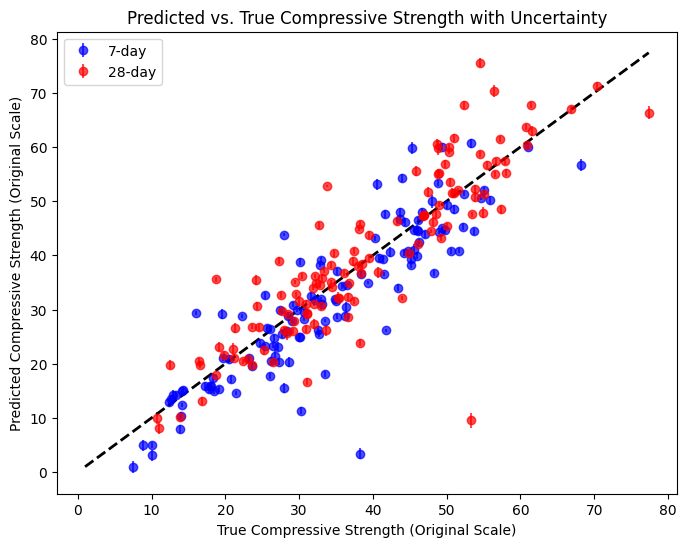

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.005
best_lr = 0.01
best_hidden_dims = [256, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [44]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 114, Combined Error: 55.9033, z-score: 7.1989
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447168e-01  7.1843797e-01 -6.5108978e-08
  1.2038745e+00  2.4817458e-01 -2.3345357e-11 -1.0689453e-09
  8.2055128e-01  2.2970904e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01  2.4462038e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 124, Combined Error: 24.6768, z-score: 2.5695
Original Features: [ 4.3200001e+01  2.4450001e+01 -1.8492739e-07  2.0059999e+01
  3.7950001e+00  2.9499999e-01  9.0500003e-01  1.4100000e+00
  1.4749999e+00  1.1000000e-01 -2.3345357e-11 -1.0689453e-09
 -4.5614623e-08  2.3250002e-01  3.1645417e-08  3.5999999e+00
  4.4000001e+00  5.0000000e-01  2.4462038e-10  2.4000000e+01
  2.4000000e+01  1.2000000e+01]

Index: 55, Combined Error: 23.8186, z-score: 2.4423
Original Features: [ 6.1299999e+01  2.9400000e+01  3.2700000e+00  1.2100000e+00
  7.500

Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.2506
Epoch 100/500, Training NLL Loss: 0.2405
Epoch 150/500, Training NLL Loss: -0.2315
Epoch 200/500, Training NLL Loss: -0.5475
Epoch 250/500, Training NLL Loss: -0.6574
Epoch 300/500, Training NLL Loss: -0.8647
Epoch 350/500, Training NLL Loss: -0.8225
Epoch 400/500, Training NLL Loss: -0.9911
Epoch 450/500, Training NLL Loss: -1.0769
Epoch 500/500, Training NLL Loss: -1.1018

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.6726224422454834
Final Test R² for 28-day compressive strength: 0.6960920095443726

First 10 predicted means for 7-day: [25.323204 36.20106  17.248753 43.027695 29.63255  26.782389 53.628838
 41.976727 48.79655  42.121124]
First 10 predicted std dev for 7-day: [0.74983127 1.03829069 0.92199863 0.62336951 0.98061023 0.95603951
 1.14827767 0.84127349 0.72636483 1.46077463]
First 10 predict

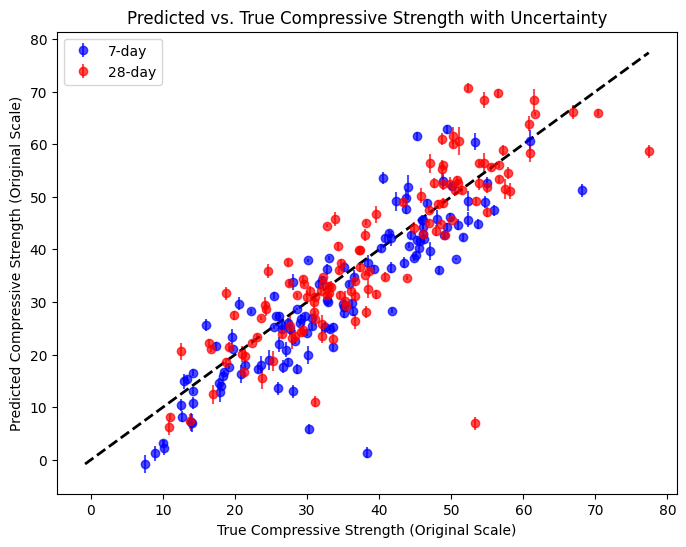

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.005
best_lr = 0.01
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 0.6325
Epoch 100/500, Training NLL Loss: 0.1529
Epoch 150/500, Training NLL Loss: -0.4714
Epoch 200/500, Training NLL Loss: -0.6123
Epoch 250/500, Training NLL Loss: -0.8300
Epoch 300/500, Training NLL Loss: -0.7385
Epoch 350/500, Training NLL Loss: -1.0047
Epoch 400/500, Training NLL Loss: -0.9853
Epoch 450/500, Training NLL Loss: -1.2244
Epoch 500/500, Training NLL Loss: -1.1675

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7130926847457886
Final Test R² for 28-day compressive strength: 0.6877743005752563

First 10 predicted means for 7-day: [27.456524 34.51635  17.84787  39.269398 29.94238  29.76505  58.132126
 43.788326 46.498608 47.643143]
First 10 predicted std dev for 7-day: [0.79539099 1.1097278  0.95920375 1.20349918 0.87839741 0.61509285
 1.50737833 0.53843194 0.59480447 0.75344272]
First 10 predict

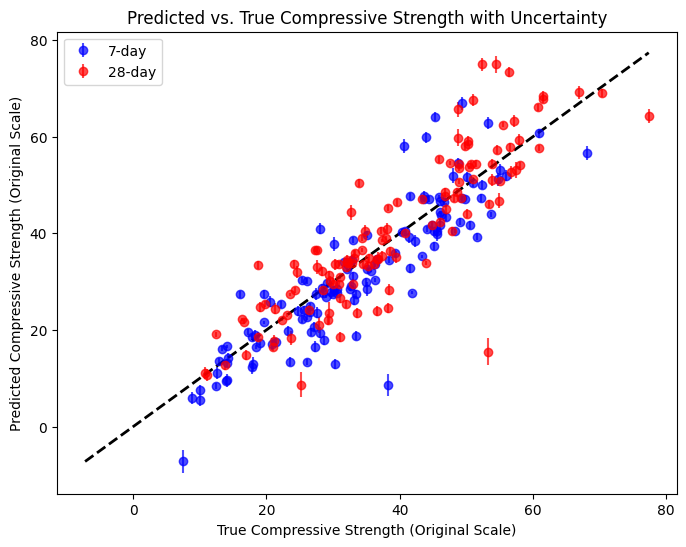

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.005
best_lr = 0.02
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.0025
best_lr = 0.001
best_hidden_dims = [256, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.9401
Epoch 100/500, Training NLL Loss: 0.4866
Epoch 150/500, Training NLL Loss: -0.0564
Epoch 200/500, Training NLL Loss: -0.3596
Epoch 250/500, Training NLL Loss: -0.4540
Epoch 300/500, Training NLL Loss: -0.7127
Epoch 350/500, Training NLL Loss: -0.8055
Epoch 400/500, Training NLL Loss: -0.7825
Epoch 450/500, Training NLL Loss: -0.9908
Epoch 500/500, Training NLL Loss: -1.0290

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7135360240936279
Final Test R² for 28-day compressive strength: 0.7073819637298584

First 10 predicted means for 7-day: [26.671463 36.815067 15.785691 45.8625   26.694202 28.369951 56.984146
 42.625816 47.88445  44.705246]
First 10 predicted std dev for 7-day: [0.62417485 0.47507307 0.96539104 0.69421419 0.78144329 0.23637889
 0.86667461 0.57721826 0.3962638  0.64053118]
First 10 predict

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.0025
best_lr = 0.001
best_hidden_dims = [128, 64, 32]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.5256
Epoch 100/500, Training NLL Loss: 0.4717
Epoch 150/500, Training NLL Loss: -0.0294
Epoch 200/500, Training NLL Loss: -0.2047
Epoch 250/500, Training NLL Loss: -0.4606
Epoch 300/500, Training NLL Loss: -0.4942
Epoch 350/500, Training NLL Loss: -0.4797
Epoch 400/500, Training NLL Loss: -0.6956
Epoch 450/500, Training NLL Loss: -0.7668
Epoch 500/500, Training NLL Loss: -0.7051

--- MC Dropout Inference on Cleaned Test Set ---

Final Test R² for 7-day compressive strength: 0.7264441251754761
Final Test R² for 28-day compressive strength: 0.7283800840377808

First 10 predicted means for 7-day: [28.530558 39.044262 21.265135 40.82694  29.711512 29.360867 50.334103
 40.353436 43.057888 45.64925 ]
First 10 predicted std dev for 7-day: [0.95093113 1.16535196 1.73276116 1.13889235 1.85429239 0.64230436
 1.13992126 1.12778522 0.75815225 1.126379  ]
First 10 predict

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Remove the test points that correspond to the common worst-prediction indices.
# =============================================================================
# These indices are the ones that appeared in both worst 7-day and 28-day lists.
common_indices = np.array([94])
# Remove them from the test arrays.
X_test_clean = np.delete(X_test, common_indices, axis=0)
y7_test_clean = np.delete(y7_test, common_indices, axis=0)
y28_test_clean = np.delete(y28_test, common_indices, axis=0)

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the cleaned arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the cleaned test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Cleaned Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.0025
best_lr = 0.001
best_hidden_dims = [256, 256, 128]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the cleaned test set.
print("\n--- MC Dropout Inference on Cleaned Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the cleaned test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


Final Training dataset size: 504
Cleaned Test dataset size: 125

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.2027
Epoch 100/500, Training NLL Loss: 0.1532
